다음의 캐글 노트북을 필사했습니다.  
https://www.kaggle.com/willkoehrsen/a-complete-introduction-and-walkthrough/data

# Data

## File descriptions

* train | test.csv  
  * 이것은 메인 테이블이며 Train, Test 의 두 파일로 쪼개져 있습니다.  
  * 하나의 행은 데이터 샘플에 있어 한 사람을 나타냅니다.  
  * 여러 사람이 하나의 가정의 일부가 될 수 있습니다.

* sample_submission.csv - 올바른 형식의 샘플 제출 파일입니다.  
  * 이 파일은 모든 test ID와 기본 설정된 값을 포함합니다.  
  * 오직 households의 heads 만이 scoriing에 사용된다는 점을 기억하세요. 모든 가정의 멤버는  test + sample submiission에 포함되지만 오직 가정의 세대주만 채점됩니다.

## Core Data fields

* id - 각 행에 대한 유일한 식별자  
* Target - 타겟은 서수(순서가 있는) 변수이며 소득 수준의 그룹을 나타냅니다.  
  * 1 = 매우 가난함
  * 2 = 중간 정도로 가난함
  * 3 = 취약한 가구  
  * 4 = 취약하지 않은 가구
* idhogar - 이는 각 가정에 대해 유일한 식별자입니다. 이는 가정에 걸친 feature 등을  생성하는데 쓰일 수 있습니다. 주어진 household의 모든 행은 이 identifier과 matching 되는 값을 가질 것입니다.  
* parentesco1 - 이 사람이 세대주인지 나타냅니다.  
* 이 데이터는 총 142 개의 컬럼을 포함합니다.

# All Data fields

변수 이름, 변수 설명

In [1]:
text = """
v2a1, Monthly rent payment
hacdor, =1 Overcrowding by bedrooms
rooms,
number of all rooms in the house
hacapo, =1 Overcrowding by rooms
v14a, =1 has bathroom in the household
refrig, =1 if the household has refrigerator
v18q, owns a tablet
v18q1, number of tablets household owns 
r4h1, Males younger than 12 years of age
r4h2, Males 12 years of age and older
r4h3, Total males in the household
r4m1, Females younger than 12 years of age
r4m2, Females 12 years of age and older
r4m3, Total females in the household
r4t1, persons younger than 12 years of age
r4t2, persons 12 years of age and older
r4t3, Total persons in the household
tamhog, size of the household
tamviv, number of persons living in the household
escolari, years of schooling
rez_esc, Years behind in school
hhsize, household size
paredblolad, =1 if predominant material on the outside wall is block or brick
paredzocalo, "=1 if predominant material on the outside wall is socket (wood,  zinc or absbesto"
paredpreb, =1 if predominant material on the outside wall is prefabricated or cement
pareddes, =1 if predominant material on the outside wall is waste material
paredmad, =1 if predominant material on the outside wall is wood
paredzinc, =1 if predominant material on the outside wall is zink
paredfibras, =1 if predominant material on the outside wall is natural fibers
paredother, =1 if predominant material on the outside wall is other
pisomoscer, "=1 if predominant material on the floor is mosaic,  ceramic,  terrazo"
pisocemento, =1 if predominant material on the floor is cement
pisoother, =1 if predominant material on the floor is other
pisonatur, =1 if predominant material on the floor is  natural material
pisonotiene, =1 if no floor at the household
pisomadera, =1 if predominant material on the floor is wood
techozinc, =1 if predominant material on the roof is metal foil or zink
techoentrepiso, "=1 if predominant material on the roof is fiber cement,  mezzanine "
techocane, =1 if predominant material on the roof is natural fibers
techootro, =1 if predominant material on the roof is other
cielorazo, =1 if the house has ceiling
abastaguadentro, =1 if water provision inside the dwelling
abastaguafuera, =1 if water provision outside the dwelling
abastaguano, =1 if no water provision
public, "=1 electricity from CNFL,  ICE,  ESPH/JASEC"
planpri, =1 electricity from private plant
noelec, =1 no electricity in the dwelling
coopele, =1 electricity from cooperative
sanitario1, =1 no toilet in the dwelling
sanitario2, =1 toilet connected to sewer or cesspool
sanitario3, =1 toilet connected to  septic tank
sanitario5, =1 toilet connected to black hole or letrine
sanitario6, =1 toilet connected to other system
energcocinar1, =1 no main source of energy used for cooking (no kitchen)
energcocinar2, =1 main source of energy used for cooking electricity
energcocinar3, =1 main source of energy used for cooking gas
energcocinar4, =1 main source of energy used for cooking wood charcoal
elimbasu1, =1 if rubbish disposal mainly by tanker truck
elimbasu2, =1 if rubbish disposal mainly by botan hollow or buried
elimbasu3, =1 if rubbish disposal mainly by burning
elimbasu4, =1 if rubbish disposal mainly by throwing in an unoccupied space
elimbasu5, "=1 if rubbish disposal mainly by throwing in river,  creek or sea"
elimbasu6, =1 if rubbish disposal mainly other
epared1, =1 if walls are bad
epared2, =1 if walls are regular
epared3, =1 if walls are good
etecho1, =1 if roof are bad
etecho2, =1 if roof are regular
etecho3, =1 if roof are good
eviv1, =1 if floor are bad
eviv2, =1 if floor are regular
eviv3, =1 if floor are good
dis, =1 if disable person
male, =1 if male
female, =1 if female
estadocivil1, =1 if less than 10 years old
estadocivil2, =1 if free or coupled uunion
estadocivil3, =1 if married
estadocivil4, =1 if divorced
estadocivil5, =1 if separated
estadocivil6, =1 if widow/er
estadocivil7, =1 if single
parentesco1, =1 if household head
parentesco2, =1 if spouse/partner
parentesco3, =1 if son/doughter
parentesco4, =1 if stepson/doughter
parentesco5, =1 if son/doughter in law
parentesco6, =1 if grandson/doughter
parentesco7, =1 if mother/father
parentesco8, =1 if father/mother in law
parentesco9, =1 if brother/sister
parentesco10, =1 if brother/sister in law
parentesco11, =1 if other family member
parentesco12, =1 if other non family member
idhogar, Household level identifier
hogar_nin, Number of children 0 to 19 in household
hogar_adul, Number of adults in household
hogar_mayor, # of individuals 65+ in the household
hogar_total, # of total individuals in the household
dependency, Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)
edjefe, years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
edjefa, years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
meaneduc,average years of education for adults (18+)
instlevel1, =1 no level of education
instlevel2, =1 incomplete primary
instlevel3, =1 complete primary
instlevel4, =1 incomplete academic secondary level
instlevel5, =1 complete academic secondary level
instlevel6, =1 incomplete technical secondary level
instlevel7, =1 complete technical secondary level
instlevel8, =1 undergraduate and higher education
instlevel9, =1 postgraduate higher education
bedrooms, number of bedrooms
overcrowding, # persons per room
tipovivi1, =1 own and fully paid house
tipovivi2, "=1 own,  paying in installments"
tipovivi3, =1 rented
tipovivi4, =1 precarious
tipovivi5, "=1 other(assigned,  borrowed)"
computer, =1 if the household has notebook or desktop computer
television, =1 if the household has TV
mobilephone, =1 if mobile phone
qmobilephone, # of mobile phones
lugar1, =1 region Central
lugar2, =1 region Chorotega
lugar3, =1 region PacÃƒÂ­fico central
lugar4, =1 region Brunca
lugar5, =1 region Huetar AtlÃƒÂ¡ntica
lugar6, =1 region Huetar Norte
area1, =1 zona urbana
area2, =2 zona rural
age, Age in years
SQBescolari, escolari squared
SQBage, age squared
SQBhogar_total, hogar_total squared
SQBedjefe, edjefe squared
SQBhogar_nin, hogar_nin squared
SQBovercrowding, overcrowding squared
SQBdependency, dependency squared
SQBmeaned, square of the mean years of education of adults (>=18) in the household
agesq, Age squared
"""

In [2]:
import re

text = re.sub(r'[\n]', '<br/>' , text)

v2a1, Monthly rent payment<br/>hacdor, =1 Overcrowding by bedrooms<br/>rooms,<br/>number of all rooms in the house<br/>hacapo, =1 Overcrowding by rooms<br/>v14a, =1 has bathroom in the household<br/>refrig, =1 if the household has refrigerator<br/>v18q, owns a tablet<br/>v18q1, number of tablets household owns <br/>r4h1, Males younger than 12 years of age<br/>r4h2, Males 12 years of age and older<br/>r4h3, Total males in the household<br/>r4m1, Females younger than 12 years of age<br/>r4m2, Females 12 years of age and older<br/>r4m3, Total females in the household<br/>r4t1, persons younger than 12 years of age<br/>r4t2, persons 12 years of age and older<br/>r4t3, Total persons in the household<br/>tamhog, size of the household<br/>tamviv, number of persons living in the household<br/>escolari, years of schooling<br/>rez_esc, Years behind in school<br/>hhsize, household size<br/>paredblolad, =1 if predominant material on the outside wall is block or brick<br/>paredzocalo, "=1 if predominant material on the outside wall is socket (wood,  zinc or absbesto"<br/>paredpreb, =1 if predominant material on the outside wall is prefabricated or cement<br/>pareddes, =1 if predominant material on the outside wall is waste material<br/>paredmad, =1 if predominant material on the outside wall is wood<br/>paredzinc, =1 if predominant material on the outside wall is zink<br/>paredfibras, =1 if predominant material on the outside wall is natural fibers<br/>paredother, =1 if predominant material on the outside wall is other<br/>pisomoscer, "=1 if predominant material on the floor is mosaic,  ceramic,  terrazo"<br/>pisocemento, =1 if predominant material on the floor is cement<br/>pisoother, =1 if predominant material on the floor is other<br/>pisonatur, =1 if predominant material on the floor is  natural material<br/>pisonotiene, =1 if no floor at the household<br/>pisomadera, =1 if predominant material on the floor is wood<br/>techozinc, =1 if predominant material on the roof is metal foil or zink<br/>techoentrepiso, "=1 if predominant material on the roof is fiber cement,  mezzanine "<br/>techocane, =1 if predominant material on the roof is natural fibers<br/>techootro, =1 if predominant material on the roof is other<br/>cielorazo, =1 if the house has ceiling<br/>abastaguadentro, =1 if water provision inside the dwelling<br/>abastaguafuera, =1 if water provision outside the dwelling<br/>abastaguano, =1 if no water provision<br/>public, "=1 electricity from CNFL,  ICE,  ESPH/JASEC"<br/>planpri, =1 electricity from private plant<br/>noelec, =1 no electricity in the dwelling<br/>coopele, =1 electricity from cooperative<br/>sanitario1, =1 no toilet in the dwelling<br/>sanitario2, =1 toilet connected to sewer or cesspool<br/>sanitario3, =1 toilet connected to  septic tank<br/>sanitario5, =1 toilet connected to black hole or letrine<br/>sanitario6, =1 toilet connected to other system<br/>energcocinar1, =1 no main source of energy used for cooking (no kitchen)<br/>energcocinar2, =1 main source of energy used for cooking electricity<br/>energcocinar3, =1 main source of energy used for cooking gas<br/>energcocinar4, =1 main source of energy used for cooking wood charcoal<br/>elimbasu1, =1 if rubbish disposal mainly by tanker truck<br/>elimbasu2, =1 if rubbish disposal mainly by botan hollow or buried<br/>elimbasu3, =1 if rubbish disposal mainly by burning<br/>elimbasu4, =1 if rubbish disposal mainly by throwing in an unoccupied space<br/>elimbasu5, "=1 if rubbish disposal mainly by throwing in river,  creek or sea"<br/>elimbasu6, =1 if rubbish disposal mainly other<br/>epared1, =1 if walls are bad<br/>epared2, =1 if walls are regular<br/>epared3, =1 if walls are good<br/>etecho1, =1 if roof are bad<br/>etecho2, =1 if roof are regular<br/>etecho3, =1 if roof are good<br/>eviv1, =1 if floor are bad<br/>eviv2, =1 if floor are regular<br/>eviv3, =1 if floor are good<br/>dis, =1 if disable person<br/>male, =1 if male<br/>female, =1 if female<br/>estadocivil1, =1 if less than 10 years old<br/>estadocivil2, =1 if free or coupled uunion<br/>estadocivil3, =1 if married<br/>estadocivil4, =1 if divorced<br/>estadocivil5, =1 if separated<br/>estadocivil6, =1 if widow/er<br/>estadocivil7, =1 if single<br/>parentesco1, =1 if household head<br/>parentesco2, =1 if spouse/partner<br/>parentesco3, =1 if son/doughter<br/>parentesco4, =1 if stepson/doughter<br/>parentesco5, =1 if son/doughter in law<br/>parentesco6, =1 if grandson/doughter<br/>parentesco7, =1 if mother/father<br/>parentesco8, =1 if father/mother in law<br/>parentesco9, =1 if brother/sister<br/>parentesco10, =1 if brother/sister in law<br/>parentesco11, =1 if other family member<br/>parentesco12, =1 if other non family member<br/>idhogar, Household level identifier<br/>hogar_nin, Number of children 0 to 19 in household<br/>hogar_adul, Number of adults in household<br/>hogar_mayor, # of individuals 65+ in the household<br/>hogar_total, # of total individuals in the household<br/>dependency, Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)<br/>edjefe, years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0<br/>edjefa, years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0<br/>meaneduc,average years of education for adults (18+)<br/>instlevel1, =1 no level of education<br/>instlevel2, =1 incomplete primary<br/>instlevel3, =1 complete primary<br/>instlevel4, =1 incomplete academic secondary level<br/>instlevel5, =1 complete academic secondary level<br/>instlevel6, =1 incomplete technical secondary level<br/>instlevel7, =1 complete technical secondary level<br/>instlevel8, =1 undergraduate and higher education<br/>instlevel9, =1 postgraduate higher education<br/>bedrooms, number of bedrooms<br/>overcrowding, # persons per room<br/>tipovivi1, =1 own and fully paid house<br/>tipovivi2, "=1 own,  paying in installments"<br/>tipovivi3, =1 rented<br/>tipovivi4, =1 precarious<br/>tipovivi5, "=1 other(assigned,  borrowed)"<br/>computer, =1 if the household has notebook or desktop computer<br/>television, =1 if the household has TV<br/>mobilephone, =1 if mobile phone<br/>qmobilephone, # of mobile phones<br/>lugar1, =1 region Central<br/>lugar2, =1 region Chorotega<br/>lugar3, =1 region PacÃƒÂ\xadfico central<br/>lugar4, =1 region Brunca<br/>lugar5, =1 region Huetar AtlÃƒÂ¡ntica<br/>lugar6, =1 region Huetar Norte<br/>area1, =1 zona urbana<br/>area2, =2 zona rural<br/>age, Age in years<br/>SQBescolari, escolari squared<br/>SQBage, age squared<br/>SQBhogar_total, hogar_total squared<br/>SQBedjefe, edjefe squared<br/>SQBhogar_nin, hogar_nin squared<br/>SQBovercrowding, overcrowding squared<br/>SQBdependency, dependency squared<br/>SQBmeaned, square of the mean years of education of adults (>=18) in the household<br/>agesq, Age squared

# Costa Rican Household Poverty Level Prediction

Costa Rican Household Poverty Level Prediction 대회의 목적은 머신러닝 모델을 발전시키는 것인데, 그건 개인과 가구의 특성 모두를 활용해 가정의 가난 수준을 예측하는 것입니다. 이 프로젝트는 사람들이 광고를 클릭하게 하는 것 보다 사회적으로 더욱 이득이 되는 과제에 우리의 스킬을 넣을 수 있는 기회를 제공합니다.

이 노트북에서, 완전한 머신러닝 솔루션에 대해 설명할 것입니다. 첫번째로 문제에 대해서 소개한 이후 데이터 셋에 대해서 철저한 탐색적 데이터 분석을 수행하고, 피처 엔지니어링을 할 것이며 여러 개의 머신러닝 모델을 시도하고, 모델을 선택하고 최적화하며 마지막으로 모델의 아웃풋을 점검해 결과를 이끌어낼 것입니다. 

This is a supervised multi-class classification machine learning problem:  
  
Supervised: provided with the labels for the training data  
Multi-class classification: Labels are discrete values with 4 classes

**중요 참고 사항: 모든 가구 구성원이 교육 데이터에서 동일한 레이블을 가져야 하지만 동일한 가정의 개인이 다른 레이블을 갖는 오류가 있습니다. 이러한 경우, 우리는 각 가구의 가장에 대한 레이블을 사용하라는 지시를 받았으며, 이는 parentesco1 == 1.0인 행으로 식별할 수 있습니다.**

모델을 만들 때 우리는 household를 훈련합니다. 각각의 가정(세대주의 가난의 수준)에 대한 레이블에 기초를 두고. raw data는 가정과 개인에 대한 특성과 개인에 대한 데이터를 포함하기 때문에 각각의 가구에 대해 집계할 방법을 찾아야 합니다. 가구에 속한 일부 개인은 세대주가 없을 수 있는데 이는 불행히도 이러한 데이터를 트레이닝에 쓸 수 없다는 것을 의미합니다. 데이터와 관련한 이러한 이슈는 완전히 **real-world** 데이터의 전형이며 그러므로 이러한 문제는 당신이 데이터 사이언스 업무에서 마주치게 될 데이터셋에 대한 훌륭한 준비입니다.

## Metric

궁극적으로 우리는 가구의 가난 수준을 정수로 예측할 수 있는 머신러닝 모델을 만들길 원합니다. 우리의 예측은 **Macro F1 Score**로 평가될 것입니다. 아마 당신은 binary classification 문제의 standard F1 score에 익숙할 것입니다. 이는 precision과 recall에 대한 조화평균입니다.

$F_1$ = $\frac{2}{\frac{1}{recall}+\frac{1}{precision}}$ = 2*$\frac{precision * recall}{precision + recall}$

multi-class 문제에 있어서는 각각의 calss에 대해 F1스코어를 평균해야 합니다. macro F1 score은 각각의 클래스에 대해 F1스코어를 평균한 것입니다. 레이블의 불균형을 고려하지 않고

$Macro F1 = \frac{F1 Class 1 + F1 Class 2 + F1 Class 3 + F1 Class 4}{4}$

다른 말로, 각 레이블 발생 횟수는 macro를 사용할 때 계산에 포함되지 않습니다. (반면 "weighted" score를 쓸 때는 계산에 포함됩니다.)

from sklearn.metrics import f1_score  
f1_score(y_true, y_predicted, average = 'macro')

이 문제의 경우 레이블이 불균형한데, 이는 metric 평가에  macro averaging을 사용하는 것을 약간 낯설게 만듭니다. 하지만 이것이 주최측에서 내린 결론입니다. 그리고 우리가 바꿀 수 있는 것은 없습니다. 작업에 있어서 당신은 레이블 불균형에 대해서 더 알고싶어 할 수 있으며 이에 맞춰 metric을 선택하고 싶어 할 수 있습니다.

# Roadmap

주제의 끝은 가구의 빈곤 수준을 예측하는 모델입니다. 반면 모델에 빠져들기 전에 문제와 데이터에 대해서 이해하는 것은 중요합니다. 또한 하나의 모델을 "best"로써 선택하기 이전에 수 많은 모델을 평가하길 원하며 모델을 만든 이후에는 예측에 대해 살펴 보길 원합니다. 우리의 로드맵은 따라서 다음과 같습니다.

1. 문재를 이해하기  
2. 탐색적 데이터 분석  
3. 피처 엔지니어링을 통해 머신러닝을 위한 데이터셋 생성  
4. 몇 개의 베이스 라인 머신러닝 모델을 비교하기  
5. 더욱 복잡한 머신러닝 모델을 시도하기  
6. 선택된 모델을 최적화하기  
7. 문제의 맥락에 맞춰 모델 예측을 탐색하기  
8. 결론을 내고 다음 단계를 세우기

위의 다음 단계를 세우기는 한 번에 하나씩 살펴보는 동안 이전 스텝으로 되돌아가며 일부의 결론에 대해 다시 논의하는 것이 반복된다는 의미입니다. 일반적으로, 데이터 사이언스는 계속해서 과거의 결론을 평가하고 개선하는 non-linear 과제입니다. 특히, 피처 엔지니어링, 모델링, 그리고 최적화는 처음의 결정이 맞는 것인지 모르기 때문에 종종 반복하는 단계입니다.

# Getting Started

우리는 문제에 대해서 꽤 잘 파악하고 있습니다. 따라서 탐색적 데이터 분석과 피처 엔지니어링으로 넘어가겠습니다. EDA에서는 피처 엔지니어링과 모델링에 쓰일 수 있는 흥미로운 이상치나 추세, 상관관계 또는 패턴에 대해서 살펴볼 것입니다. 우리는 데이터를 양적으로(with statistics) 그리고 시각적으로(with figures) 탐색하는 것을 확실히 해두어야 합니다.

일단 데이터와 잠재적으로 유용한 관계에 대해 꽤 잘 알고 있기 때문에 피처 엔지니어링과 베이스라인 모델을 할 수 있습니다.(이는 머신러닝 파이프라인에 있어서 가장 중요한 부분입니다.) 이는 리더보드에서 top을 차지하게 해주지는 않지만 튼튼한 기반이 될 것입니다.

### Imports

In [3]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a few plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

### Read in Data and Look at Summary information

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
pd.options.display.max_columns = 150

# Read in data
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle study/Costa Rican Household Poverty Level Prediction/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle study/Costa Rican Household Poverty Level Prediction/data/test.csv')
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


이렇게 함으로써 순서가 없는 것으로 보이는 모든 컬럼들을 볼 수 있습니다. 빠르게 데이터의 개요를 보기 위해 `df.info()`를 사용하겠습니다.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


이는 130개의 정수 컬럼, 8개의 소수 컬럼, 5개의 오브젝트 컬럼이 있음을 의미합니다. 정수 컬럼은 아마 Boolean 변수(0 or 1)나 순서형 변수로 나타날 것입니다. object 컬럼은 직접 머신러닝 모델에 넣지 못하기 때문에 아마 문제가 제기된 것 같습니다.

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


### integer Columns

정수 컬럼의 고유한 값의 분포를 살펴봅시다. 각각의 컬럼에 있어 고유한 값의 개수를 셀 것이며 bar plot으로 결과를 보여줄 것입니다.

In [8]:
train.select_dtypes(np.int64).nunique()

hacdor             2
rooms             11
hacapo             2
v14a               2
refrig             2
                  ..
SQBhogar_total    13
SQBedjefe         22
SQBhogar_nin      10
agesq             97
Target             4
Length: 130, dtype: int64

In [9]:
train.select_dtypes(np.int64).nunique().value_counts().sort_index()

1       1
2     101
4       2
6       2
7       3
9       3
10      3
11      3
13      5
14      1
22      3
97      3
dtype: int64

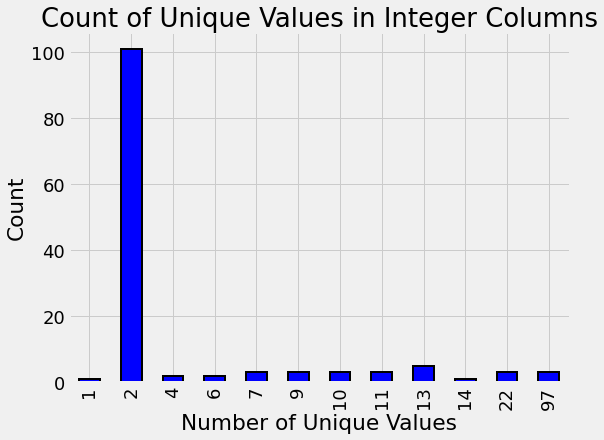

In [10]:
train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(color = 'blue', figsize = (8, 6), edgecolor = 'k', linewidth = 2);
plt.xlabel('Number of Unique Values'); plt.ylabel('Count');
plt.title('Count of Unique Values in Integer Columns');

오직 2개의 값만 있는 컬럼은 많은 경우 Booleans(0 or 1)로 나타납니다. 이러한 불린 정보는 이미 가구 수준에 있습니다. 예를 들어, `refrig` 컬럼은 가구가 냉장고의 소유 여부를 나타냅니다. 가구 수준에 있는 불린 컬럼으로 피처를 만들 때가 되면 이들을 집계할 필요가 없습니다. 반면에 개인의 수준에 있는 불린 컬럼은 집계할 필요가 있습니다.

### Float Columns

다른 컬럼 타입은 float인데 이는 연속적인 변수로 나타납니다. 우리는 빠르게 분포 플롯을 만들어서 모든 float 컬럼의 분포를 볼 수 있습니다. `OrderedDict`를 사용해서 빈곤 수준을 지도에 나타내 색을 칠할 것입니다. 왜냐하면 이는 우리가 지정한 것과 같은 순서로 키와 값을 가지고 있기 때문입니다.(일반 파이썬 딕셔너리와는 다릅니다.)

아래의 그래프는 `Target` 겂에 따라 색칠된 `float` 컬럼의 분포를 보여줍니다. 이러한 플롯을 가지고 각별히 다름이 있는지 볼 수 있습니다. 가구의 빈곤 수준에 따른 변수의 분포에 대해

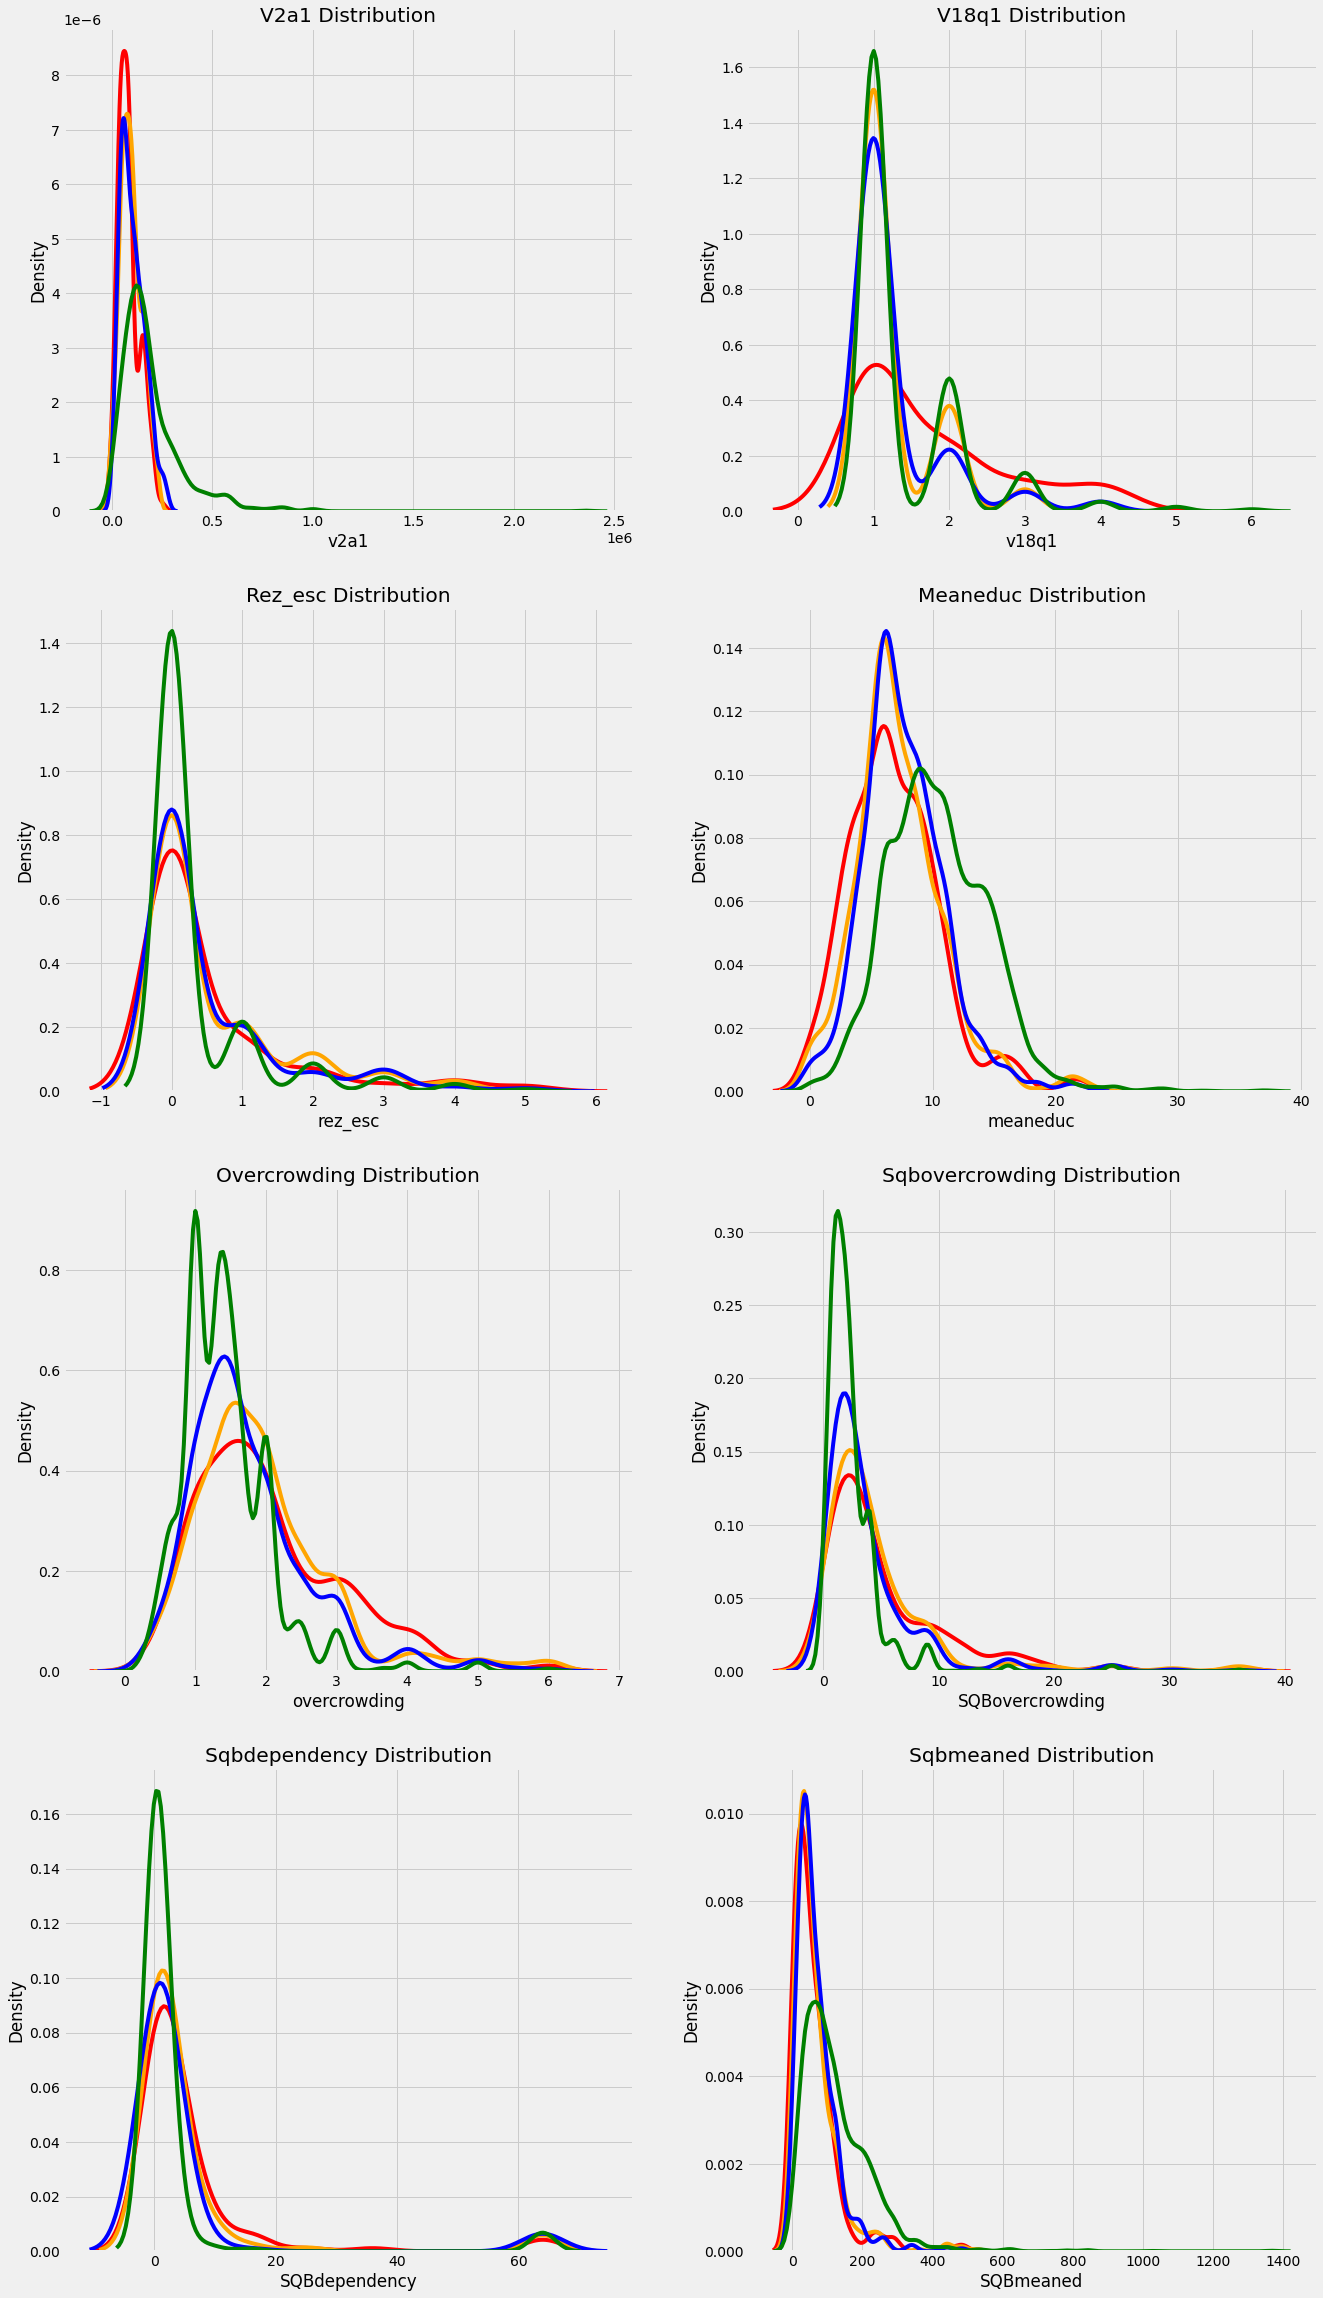

In [11]:
from collections import OrderedDict

plt.figure(figsize = (20, 16))
plt.style.use('fivethirtyeight')

# Color mapping
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
poverty_mapping = OrderedDict({1: 'extrime', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})

# Iterate Through the float columns
for i, col in enumerate(train.select_dtypes('float')):
  ax = plt.subplot(4, 2, i + 1)
  # Iterate Through the poverty levels
  for poverty_level, color in colors.items():
    # Plot each poverty lavel as a separate line
    # train.loc[train['Target'] == poverty_level, col] = train.loc[train['Target'] == poverty_level][col] 과 같은 의미
    sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), ax = ax,
                      color = color, label = poverty_mapping[poverty_level])
    
  plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

  plt.subplots_adjust(top = 2)

  # red = extream
  # orange = moderate
  # blue = vulnerable
  # green = non vulnerable

In [12]:
colors

OrderedDict([(1, 'red'), (2, 'orange'), (3, 'blue'), (4, 'green')])

In [13]:
poverty_mapping

OrderedDict([(1, 'extrime'),
             (2, 'moderate'),
             (3, 'vulnerable'),
             (4, 'non vulnerable')])

In [14]:
for i, col in enumerate(train.select_dtypes('float')):
  print(col)

v2a1
v18q1
rez_esc
meaneduc
overcrowding
SQBovercrowding
SQBdependency
SQBmeaned


나중에 변수들과 `Target` 사이의 상관관계를 계산할 것입니다. 그리고 피처들 간의 관계를 측정할 것입니다. 하지만 이러한 플롯들은 이미 우리에게 감각을 줍니다. 어떤 변수들이 모델과 가장 관련이 있을지를. 예를 들어서 `meaneduc`은 가정에 속한 어른들의 평균 교육 수준을 나타네는데, 이는 빈곤 수준과 관련 있음이 드러납니다. **더 높은 성인들의 교육 수준 평균은 타겟의 더 높은 값을 이끌어냅니다. 이는 덜 심각한 빈곤의 수준입니다.** 교육의 중요성에 대한 주제는 이 노트북에 있어 우리가 계속해서 되풀이할 것입니다.

### Object Comlumns

마지막 컬럼의 타입은 `object`인데, 이는 다음과 같이 살펴볼 수 있습니다.

In [15]:
train.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


`Id`와 `idhogar` objecet types는 말이 됩니다. 이는 식별 변수이기 때문입니다. 하지만 다른 컬럼들은 숫자와 문자의 조합인듯 보입니다. 우리는 이를 머신러닝을 하기 전에 해결할 필요가 있습니다. 이러한 컬럼들의 문서에 따르면

* `dependency`: 의존율, calculated = 19세 미만 또는 64세 이상 가구원 수 / 19세에서 64세 사이의 가구원 수 (일할 수 없는 사람들 / 일할 수 있는 사람들?)
* `edjefe`: years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0  
* `edjefa`: years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

이러한 설명은 이슈를 명확하게 만듭니다. **yes = 1**, **no = 0** 과 같은 세 개의 변수에 있어서. 이러한 변수를 매핑과 floats로 변환하여 고칠 수 있습니다.

In [16]:
mapping = {"yes": 1, "no": 0}

# Apply same operation to bith train and test
for df in [train, test]:
  # Fill in the values with the correct mapping
  df['dependency'] = df['dependency'].replace(mapping).astype(np.float64)
  df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float64)
  df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)

train[['dependency', 'edjefa', 'edjefe']].describe()

,dependency,edjefa,edjefe
count,9557.000000,9557.000000,9557.000000
mean,1.149550,2.896830,5.096788
std,1.605993,4.612056,5.246513
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,0.000000,6.000000
75%,1.333333,6.000000,9.000000
max,8.000000,21.000000,21.000000


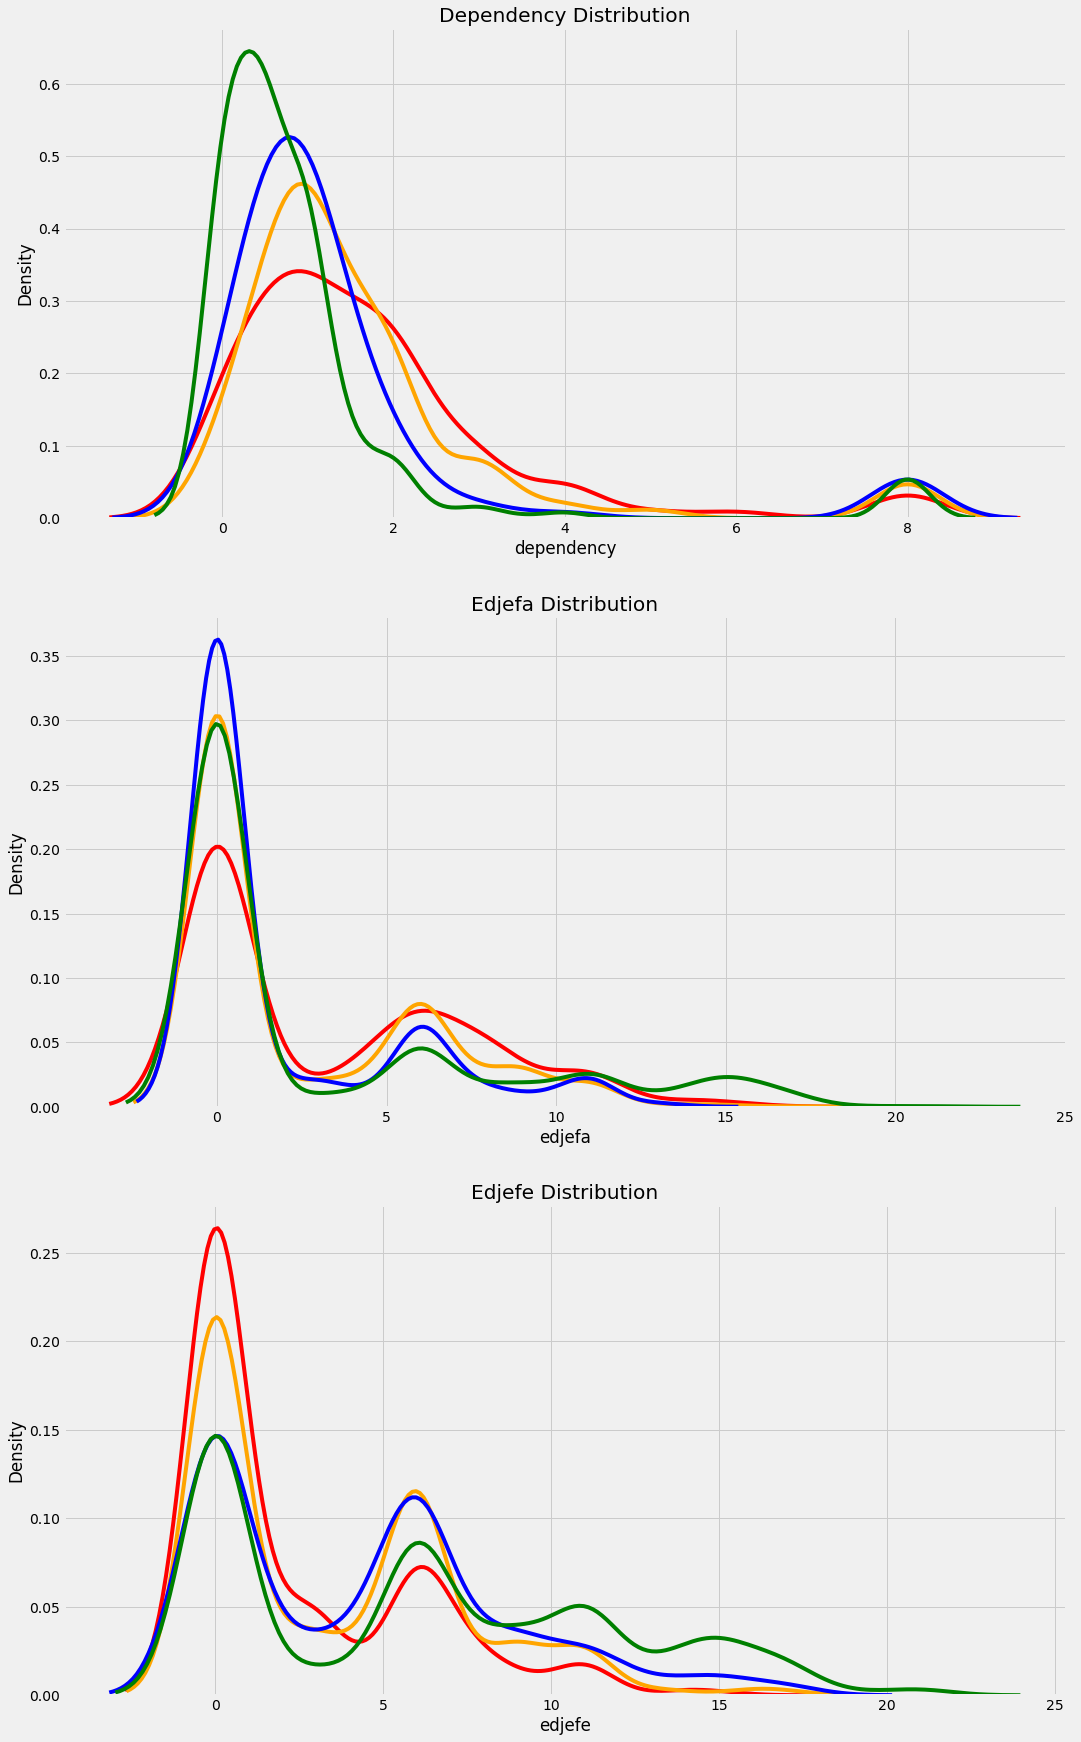

In [17]:
plt.figure(figsize = (16, 12))

# Iterate through the float columns
for i, col in enumerate(['dependency', 'edjefa', 'edjefe']):
    ax = plt.subplot(3, 1, i + 1)
    for poverty_level, color in colors.items():
      # Plot each poverty level as a separate line
      sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(),
                      ax = ax, color = color, label = poverty_mapping[poverty_level])
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')
plt.subplots_adjust(top = 2)

  # red = extream
  # orange = moderate
  # blue = vulnerable
  # green = non vulnerable

이러한 변수들은 숫자로써 올바르게 나타나며 머신러닝 모델에 투입할 수 있습니다.  
  
위와 같은 동작을 보다 쉽게 하기 위해서 트레이닝과 테스팅 데이터프레임을 조인할 것입니다. 이는 피처 엔지니어링을 할 때 중요합니다. 왜냐하면 두 데이터프레임에 똑같은 동작을 적용하길 원하기 때문입니다. 이로써 똑같은 피처를 갖게 됩니다. 나중에 이 세트를 `Target`을 기반으로 분리할 수 있습니다.

In [18]:
# Add null Target column to test
test['Target'] = np.nan
data = train.append(test, ignore_index = True)

In [19]:
data

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,0.0,10.0,0.0,10.00,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.00,100.0000,1849,4.0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8.0,12.0,0.0,12.00,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.00,144.0000,4489,4.0
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8.0,0.0,11.0,11.00,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.00,121.0000,8464,4.0
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,1.0,11.0,0.0,11.00,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.00,121.0000,289,4.0
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,1.0,11.0,0.0,11.00,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.00,121.0000,1369,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33408,ID_a065a7cad,NaN,1,2,1,1,1,0,NaN,0,2,2,1,3,4,1,5,6,6,6,3,0.0,6,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,3aa78c5

In [20]:
data['Target'].unique()

array([ 4.,  2.,  3.,  1., nan])

In [21]:
test['Target'].unique()

array([nan])

위 두 개의 결과가 다른 이유는 무엇인지 모르겠음

## Exploring Label Distribution

다음으로, 얼마나 문제가 균형이 맞지 않는지(imbalanced)에 대한 아이디어를 얻을 수 있습니다. 분포의 레이블을 살펴 봄으로써. 네 개의 가능한 정수 수준이 있는데, 이는 빈곤 수준의 다른 정도를 나타냅니다. 올바른 레이블을 보려면 `parentesco1 == 1` 컬럼 만을 부분집합 해야합니다. 이는 세대주이기 때문이며 각각의 가구에 대해서 올바른 레이블이기 때문입니다.  
  
아래의 바 플롯은 트레이닝 레이블의 분포를 보여줍니다.

1.0     222
2.0     442
3.0     355
4.0    1954
Name: Target, dtype: int64

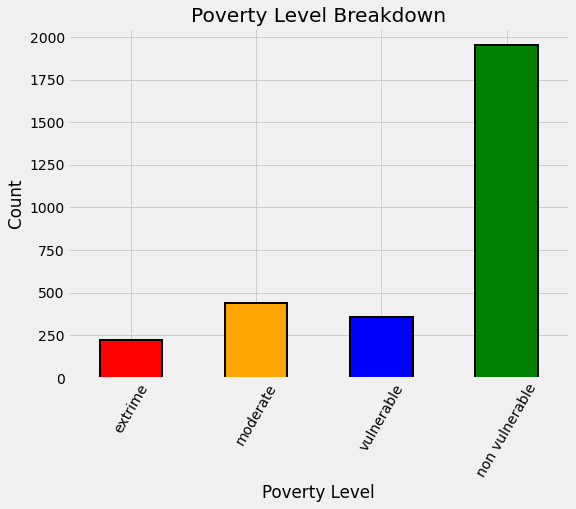

In [22]:
# Heads of household
heads = data.loc[data['parentesco1'] == 1].copy()

# Labels for training
train_labels = data.loc[(data['Target'].notnull()) & (data['parentesco1'] == 1), ['Target', 'idhogar']]

# Value counts of target
label_counts = train_labels['Target'].value_counts().sort_index()

# Bar plot of occurrences of each label
label_counts.plot.bar(figsize = (8, 6), color = colors.values(), edgecolor = 'k', linewidth = 2)

# Formatting
# poverty_mapping = OrderedDict({1: 'extrime', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})
plt.xlabel('Poverty Level'); plt.ylabel('Count');
plt.xticks([x - 1 for x in poverty_mapping.keys()], list(poverty_mapping.values()), rotation = 60)
plt.title('Poverty Level Breakdown');

label_counts

우리는 불균형한 클래스 문제에 직면했습니다. (이는 흥미롭게 만듭니다. 왜 대회 조직자들이 macro F1 score를 메트릭으로써 선택했는지 weighted F1 스코어 대신에) non-vulnerabel로 분류되는 가구가 더 많습니다. 나머지 다른 카테고리보다. extream poverty 클래스는 가장 적습니다.  
  
불균형한 분류 문제에 있어서 한가지 문제는 머신러닝 모델이 소수의 클래스들을 예측하는데 있어 어려움을 겪을 것이라는 것입니다. 왜냐하면 머신러닝 모델은 더욱 적은 예시를 보기 때문입니다. 클래스 불균형을 고칠 한 가지 가능한 방법은 오버샘플링을 거치는 것입니다. 

## Addressing Wrong Labels

현실적인 데이터셋과 마찬가지로 Costa Rican Poverty 데이터는 몇 가지 이슈가 있습니다. 전형적으로 80%의 데이터 사이언스 프로젝트는 cleaning data와 이상치, 혹은 에러를 고치는데 쓰여질 것입니다. 이들은 사람의 입력 오류일 수도 있고 측정 오류일 수도 있고, 또는 가끔은 그냥 두드러지지만 맞는 극값일 수도 있습니다. 이러한 문제에 있어서 몇몇 레이블은 정확하지 않은데, 같은 가구에 속한 개인이 다른 빈곤 수준을 갖기 때문입니다. 우리는 이런 현상이 왜 일어나는지 듣지 못했지만 세대주를 진짜 레이블로 사용하라고 전해들었습니다.  
  
이 정보는 우리의 일을 훨씬 수월하게 만듭니다. 하지만 현실 세계의 문제에서 우리는 레이블이 왜 틀린지 그리고 우리 스스로 문제를 해결하는지 알아내야 합니다. 이 섹션은 레이블에 대한 해당 이슈를 고칩니다. 비록 엄격하게 필요하지는 않더라도.

### identify Errors

먼저 오류를 찾아 수정해야 합니다. 가족 구성원들이 다른 레이블을 가지고 있는 가구를 찾기 위해서 household를 기준으로 데이터를 그룹하며 `Target`에 대해 한가지 유일한 값이 있는지 체크할 수 있습니다.

In [23]:
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
len(all_equal)

2988

In [24]:
# Groupby the household and figure out the number of unique values
# apply(lambda x: x.nunique() == 1)를 하면 일괄적으로 1값이 적용되는거 아닌가? 왜 boolean 값이 나오는거지?
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
not_equal = all_equal[all_equal != True]
print('There are {} households where tje family members do not all have the same target.' .format(len(not_equal)))

There are 85 households where tje family members do not all have the same target.


Let's look at one example.

In [25]:
not_equal.index[0]

'0172ab1d9'

In [26]:
train[train['idhogar'] == not_equal.index[0]][['idhogar', 'parentesco1', 'Target']]

,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


관계자들은 정확한 레이블은 `parentesco1 == 1`인 세대주라고 말을 해줬습니다. 이러한 세대주에 대해서 모든 구성원에 대해 정확한 레이블은 3입니다. 우리는 가구에 있는 모든 개인에 대해서 알맞은 빈곤 수준을 재할당함으로써 이를 고칠 수 있습니다. 현실세계에서 어떻게 문제를 스스로 고쳐야 할 지에 대해 힘든 결정을 내려야 할 수도 있습니다.

### Families without Heads of Household

우리는 레이블 불일치를 고칠 수 있습니다. 같은 가구에 속한 세대주의 레이블을 개인에개 할당함으로써. 하지만 그 전에 물어야 합니다. 세대주가 없는 가구가 있다면? 그리고 이러한 가구의 구성원들이 다른 레이블 값을 가지고 있다면?

In [27]:
# parentesco1 - 이 사람이 세대주인지 나타냅니다. [0, 1]
# idhogar - 이는 각 가정에 대해 유일한 식별자입니다.
households_leader = train.groupby('idhogar')['parentesco1'].sum()

# Find households without a head
households_no_head = train.loc[train['idhogar'].isin(households_leader[households_leader == 0].index), :]

print('Threr are {} households without a head.' .format(households_no_head['idhogar'].nunique()))

Threr are 15 households without a head.


In [28]:
households_leader = train.groupby('idhogar')['parentesco1'].sum()
households_leader.unique()

array([1, 0])

In [29]:
# Find households without a head and where labels are different

# 세대주가 없는 세대의 Target이 1인 구성원을 찾음
households_no_head_equal = households_no_head.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

print('{} Households with no head have different labels.' .format(sum(households_no_head_equal == False)))

0 Households with no head have different labels.


이는 세대주가 없으며 레이블 값이 다른 구성원에 대해서 걱정할 필요가 없다는 것을 의미합니다. 이러한 문제에 대해서 관계자에 의하면 가구에 세대주가 없으면 진짜 레이블이 없는 것입니다. 그러므로 트레이닝에 이러한 것들을 사용하지 않을 것입니다.

### Correct Errors

이제 세대주를 가진 가구와 다른 빈곤 수준을 가진 세대원에 대한 레이블을 고칠 것입니다.

In [30]:
# Iterate through each household
for household in not_equal.index:
  # Find the correct label (for the fead of housefold)
  true_target = int(train[(train['idhogar'] == household) & (train['parentesco1'] == 1.0)]['Target'])

  # Set the correct label for all members in the household
  train.loc[train['idhogar'] == household, 'Target'] = true_target

# Groupby the household and figure out the number of unique values
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
not_equal = all_equal[all_equal != True]
print('Threr are {} households where the family members do not all have the same target.' .format(len(not_equal)))

Threr are 0 households where the family members do not all have the same target.


세대주의 것만 레이블로 쓰기로 했기 때문에 해당 단계는 반드시 필요하지는 않습니다. 하지만 이는 데이터 에러를 바로 잡는 흐름을 보여줍니다.

## Missing Variabels

EDA에서 가장 중요한 단계 중 하나는 데이터에 있는 결측치를 찾고 이들을 어떻게 다룰지 결정하는 것입니다. 결측치들은 머신러닝 모델을 사용하기 전에 채워져야 하며 우리는 피처에 기반해 이들을 채우는 가장 좋은 전략을 생각할 필요가 있습니다. 여기서부터 데이터 정의를 파헤쳐야 합니다.  
  
첫 번째로 각 컬럼에 있는 결측치의 비율을 살펴볼 것입니다.

In [31]:
data.isnull().sum()

Id                     0
v2a1               24263
hacdor                 0
rooms                  0
hacapo                 0
                   ...  
SQBovercrowding        0
SQBdependency          0
SQBmeaned             36
agesq                  0
Target             23856
Length: 143, dtype: int64

In [32]:
# Number of missing in each column
missing = pd.DataFrame(data.isnull().sum()).rename(columns = {0: 'total'})

# Create a percentage missing
missing['percent'] = missing['total'] / len(data)

missing.sort_values('percent', ascending = False).head(10).drop('Target')

,total,percent
rez_esc,27581,0.825457
v18q1,25468,0.762218
v2a1,24263,0.726154
SQBmeaned,36,0.001077
meaneduc,36,0.001077
hogar_adul,0,0.000000
parentesco10,0,0.000000
parentesco11,0,0.000000
parentesco12,0,0.000000


`Target`에 대해서 걱정할 필요는 없는데 왜냐하면 test 데이터에 대해서는 이들을 `NaN` 값으로 만들 것입니다 . 반면에 높은 결측치 비율이 있는 나머지 3개의 컬럼은 고칠 필요가 있습니다.

**v18q1**: Number of tablets

`v18q1`은 가족에 속한 tablets의 수를 가르킵니다. 우리는 이러한 변수 값의 수에 대해서 살펴볼 수 있습니다. 이는 가계 변수이기 때문에 가구의 수준에 대해서 살펴 보는 것만이 말이 됩니다. 따라서 우리는 오직 세대주의 행만을 선택할 것입니다.

### Function to Plot Value Counts

서로 다른 컬럼에 대한 값의 수를 그리기를 원할 수 있기 때문에 우리를 위한 간단한 함수를 작성할 수 있습니다.

In [33]:
def plot_value_counts(df, col, heads_only = False):
  """Plot value counts of a columns, optionally with only the heads of a household"""
  # Select heads of household
  if heads_only:
    df = df.loc[df['parentesco1'] == 1].copy()

  plt.figure(figsize = (8, 6))
  df[col].value_counts().sort_index().plot.bar(color = 'blue', edgecolor = 'k', linewidth = 2)
  plt.xlabel(f'{col}'); plt.title(f'{col} Value Counts'); plt.ylabel('Count')
  plt.show()

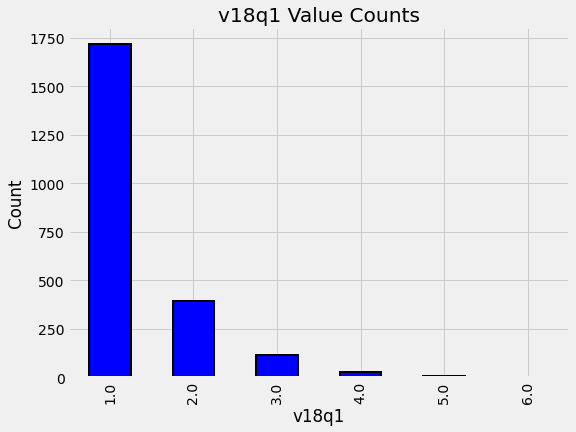

In [34]:
plot_value_counts(heads, 'v18q1')

tablets 소유의 가장 흔한 수는 1인 것 같습니다. 만약에 tablets가 있는 데이터 만을 사용한다면. 하지만 이들이 없는 데이터에 대해서도 생각해야 합니다. 이러한 케이스에서는 해당 카테고리에서 `nan` 값이 있는 가족이 tablets를 소유하지 않았음을 의미할 수 있습니다. 데이터에 대한 정의를 살펴 보면 `v18q`가 가족이 tablet을 소유하고 있는지를 가리키는 것을 볼 수 있습니다. 우리는 해당 컬럼을 tablets의 수와 관련하여 살펴봐야 합니다. 우리의 가설을 유지할 수 있는지 살펴보기 위해서.

우리는 `v18q`의 값을 `groupby`할 수 있습니다. (1은 tablet를 소유하고 0은 그렇지 않습니다.) 그런 다음 `v18q`의 결측치 수를 계산합니다. 이 작업은 결측치가 가족이 tablet을 소유하지 않았는지를 나타내는지 알려줄 것입니다.

In [35]:
heads.groupby('v18q')['v18q1'].apply(lambda x: x.isnull().sum())

v18q
0    8044
1       0
Name: v18q1, dtype: int64

` v18q1`에 대해 `nan`을 가진 모든 가족은 tablet을 소유하지 않았습니다. 그러므로 이러한 결측치를 0으로 채울 수 있습니다.

In [36]:
data['v18q1'] = data['v18q1'].fillna(0)

**v2a1**: 월세 납부

다음 결측치가 있는 컬럼은 `v2a1`입니다. 
  
월세 납부의 결측치를 살펴 보는 것에 더해서 `tipovivi_`의 분포에 대해 살펴 보는 것도 흥미롭습니다. 해당 컬럼은 집에 대한 소유/대여 상태를 보여줍니다.

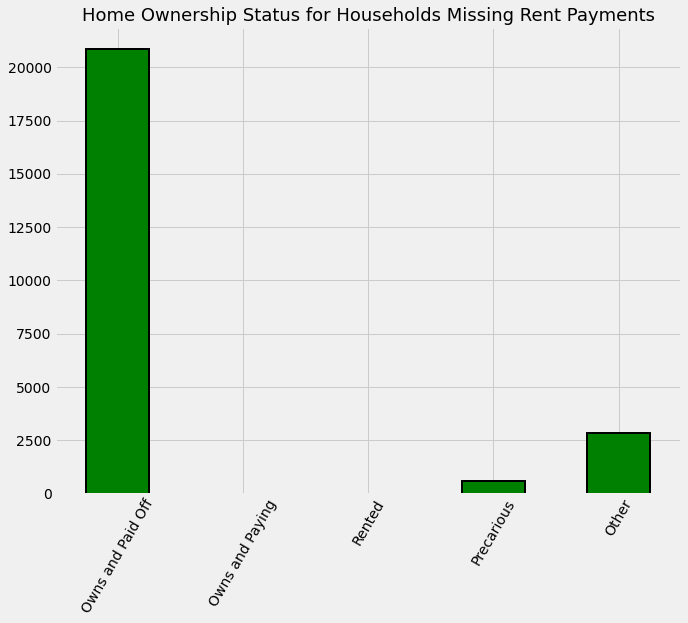

In [37]:
# Variables indicating home ownership
# tipovivi_1, tipovivi_2, tipovivi_3, tipovivi_4, tipovivi_5
own_variables = [x for x in data if x.startswith('tipo')]

# Plot of the home ownership variables for home missing rent payment
data.loc[data['v2a1'].isnull(), own_variables].sum().plot.bar(figsize = (10, 8), color = 'green', edgecolor = 'k', linewidth = 2);
plt.xticks([0, 1, 2, 3, 4], ['Owns and Paid Off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'], rotation = 60)
plt.title('Home Ownership Status for Households Missing Rent Payments', size = 18);

집 소유에 대한 변수의 뜻은 아래와 같습니다.  
* tipovivi_1 = 1: own and fully paid house  
* tipovivi_2 = 2: own, paying in installments  
* tipovivi_1 = 3: rented  
* tipovivi_1 = 4: precarious  
* tipovivi_1 = 5: other(assigned, borrowed)

해당 이슈를 대부분 풀었습니다. 월세 납부를 하지 않는 가구는 일반적으로 그들의 집을 가지고 있습니다. 다른 소수의 상황에 대해서는 없어진 정보의 이유에 대해서 확신할 수 없습니다.

소유되거나 월세 납부가 missing된 집에 대해 월세를 제로로 값을 설정할 수 있습니다. 다른 집에 대해서는 결측치가 imputed 되도록 놔둘 수 있으며 이러한 가구들이 결측치가 있는지를 가리키는 Boolean flag를 추가할 것입니다.

In [38]:
# Fill in households that own the house with 0 rent payment
data.loc[(data['tipovivi1'] == 1), 'v2a1'] = 0

# Create missing rent payment column
data['v2a1-missing'] = data['v2a1'].isnull()

data['v2a1-missing'].value_counts()

False    29994
True      3419
Name: v2a1-missing, dtype: int64

**rez_esc**: years behind in school

높은 결측치 비율을 가지고 있는 마지막 컬럼은 `rez_esc`입니다. 결측치를 가지고 있는 가족에 대해 학교에 다니고 있는 아이들이 없다는 것이 가능합니다. 이러한 컬럼이 결측치를 가지고 있거나 결측치를 가지고 있지 않은 사람들의 나이를 알아 봄으로써 테스트해 밝혀냅시다. 

In [39]:
data.loc[data['rez_esc'].notnull()]['age'].describe()

count    5832.000000
mean       12.185700
std         3.198618
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

결측치를 가지고 있지 않은 가장 많은 나이는 17살입니다. 이보다 나이가 많은 사람들에 대해서 아마 우리는 이들이 심플하게 학교에 가지 않는다고 가정할 수 있습니다. 결측치를 가진 사람들의 나이에 대해서 살펴봅시다.

In [40]:
data.loc[data['rez_esc'].isnull()]['age'].describe()

count    27581.000000
mean        39.110656
std         20.983114
min          0.000000
25%         24.000000
50%         38.000000
75%         54.000000
max         97.000000
Name: age, dtype: float64

대회의 discussions 일부를 읽었다면 해당 변수가 오직 7살에서 19살인 개인에 대해서만 정의됐다는 것을 배웠을 것입니다. 이보다 나이가 많거나 적은 범위에 대해서는 아마 years behind가 없으므로 값을 0으로 설정해야 합니다. 이러한 변수에 대해서 만약 개인이 19살을 넘고 결측치가 있다면 혹은 7살보다 어리고 결측치가 있다면 0으로 설정할 수 있습니다. 다른 사람에 대해서는 imputed되도록 값을 놔둘 것이며 boolean flag만 추가할 것입니다.

In [82]:
# if individual is over 19 or younger than 7 and missing years behind, set it to 0
data.loc[((data['age'] > 19) | (data['age'] < 7)) & (data['rez_esc'].isnull()), 'rez_esc'] = 0

# Add a flag for those beween 7 and 19 with a missing value
data['rez_esc-missing'] = data['rez_esc'].isnull()
data['rez_esc-missing'].unique()

array([False,  True])

`rez_esc` 컬럼에 하나의 아웃라이어가 있습니다. 대회의 discussions를 읽었다면 해당 변수의 최대 값은 5인 것을 배웠을 것입니다. 그러므로 5를 넘는 값들에 대해서 5를 설정해 주어야 합니다.

In [42]:
data.loc[data['rez_esc'] > 5, 'rez_esc'] = 5

## Plot Two Categorical Variables

두 카테고리컬 변수들의 상호작용이 어떻게 이루어지는지 보기 위해서는 여러 가지 플로팅 옵션이 있습니다. 스캐터플롯, 박스플롯 등.. 이러한 선택지에 대해서 만족스럽지 못하기 때문에 아래의 함수를 작성할 것입니다. 이 함수는 기본적으로 두개의 범주형 스캐터 플롯인데 포인트의 크기가 각 x값에 의해 나타나는 주어진 y값의 비율입니다.

In [83]:
def plot_categoricals(x, y, data, annotate = True):
  """ Plot counts of two categoricals.
       Size is raw count for each grouping.
       Percentages are for a given value of y. """

  # Raw counts
  raw_counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = False))
  raw_counts = raw_counts.rename(columns = {x: 'raw_count'})

  # Calculate counts for each group of x and y
  counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = True))

  # Rename the column nad reset the index
  counts = counts.rename(columns = {x: 'normalized_count'}).reset_index()
  counts['percent'] = 100 * counts['normalized_count']

  # Add the raw count
  counts['raw_count'] = list(raw_counts['raw_count'])

  plt.figure(figsize = (14, 10))
  # Scatter Plot sized by percent | s: The marker size in points**2
  plt.scatter(counts[x], counts[y], edgecolor = 'k', color = 'lightgreen',
                  s = 100 * np.sqrt(counts['raw_count']), marker = 'o', alpha = 0.6, linewidth = 1.5)
  
  if annotate:
    # Annotate the plot with text
    for i, row in counts.iterrows():
      # Put text with appropriate offsets
      plt.annotate(xy = (row[x] - (1 / counts[x].nunique()), row[y] - (0.15 / counts[y].nunique())),
                        color = 'navy', s = f"{round(row['percent'], 1)}%")
      
  # Set tick marks
  plt.yticks(counts[y].unique())
  plt.xticks(counts[x].unique())

  # Transform min and max to evenly space in square root domain
  sqr_min = int(np.sqrt(raw_counts['raw_count'].min()))
  sqr_max = int(np.sqrt(raw_counts['raw_count'].max()))

  # 5 sizes for legend
  msizes = list(range(sqr_min, sqr_max, int((sqr_max - sqr_min) / 5)))
  markers = []

  # Markers for legend
  for size in msizes:
    markers.append(plt.scatter([], [], s = 100 * size, label = f'{int(round(np.square(size) / 100) * 100)}',
                                color = 'lightgreen', alpha = 0.6, edgecolor = 'k', linewidth = 1.5))
    
    # Legend and formatting
    plt.legend(handles = markers, title = 'Counts', labelspacing = 3, handletextpad = 2,
                    fontsize = 16, loc = (1.10, 0.19))
    
    plt.annotate(f' * Size represents raw count while % is for a given y value.', xy = (0, 1),
                        xycoords = 'figure points', size = 10)
    
    # Adgust axes limits
    plt.xlim((counts[x].min() - (6 / counts[x].nunique()), counts[x].max() + (6 / counts[x].nunique())))
    plt.ylim((counts[y].min() - (4 / counts[y].nunique()), counts[y].max() + (4 / counts[y].nunique())))
    plt.grid(None)
    plt.xlabel(f"{x}"); plt.ylabel(f"{y}"); plt.title(f"{y} vs {x}");

In [44]:
raw_counts = pd.DataFrame(data.groupby('Target')['rez_esc'].value_counts(normalize = False))
raw_counts.head()

rez_esc
Target rez_esc         
1.0    0.0          682
       1.0           27
       2.0           12
       4.0            6
       3.0            4

In [45]:
counts = pd.DataFrame(data.groupby('Target')['rez_esc'].value_counts(normalize = True))
counts = counts.rename(columns = {'rez_esc': 'normalized_count'}).reset_index()
counts.head()

,Target,rez_esc,normalized_count
0,1.0,0.0,0.929155
1,1.0,1.0,0.036785
2,1.0,2.0,0.016349
3,1.0,4.0,0.008174
4,1.0,3.0,0.005450


In [46]:
counts['rez_esc'].nunique()

6

In [47]:
cnt = -1
 
for i, row in counts.iterrows():
  cnt = cnt + 1
  print(i, '\n', row)

  if cnt == 5:
    break

0 
 Target              1.000000
rez_esc             0.000000
normalized_count    0.929155
Name: 0, dtype: float64
1 
 Target              1.000000
rez_esc             1.000000
normalized_count    0.036785
Name: 1, dtype: float64
2 
 Target              1.000000
rez_esc             2.000000
normalized_count    0.016349
Name: 2, dtype: float64
3 
 Target              1.000000
rez_esc             4.000000
normalized_count    0.008174
Name: 3, dtype: float64
4 
 Target              1.00000
rez_esc             3.00000
normalized_count    0.00545
Name: 4, dtype: float64
5 
 Target              1.000000
rez_esc             5.000000
normalized_count    0.004087
Name: 5, dtype: float64


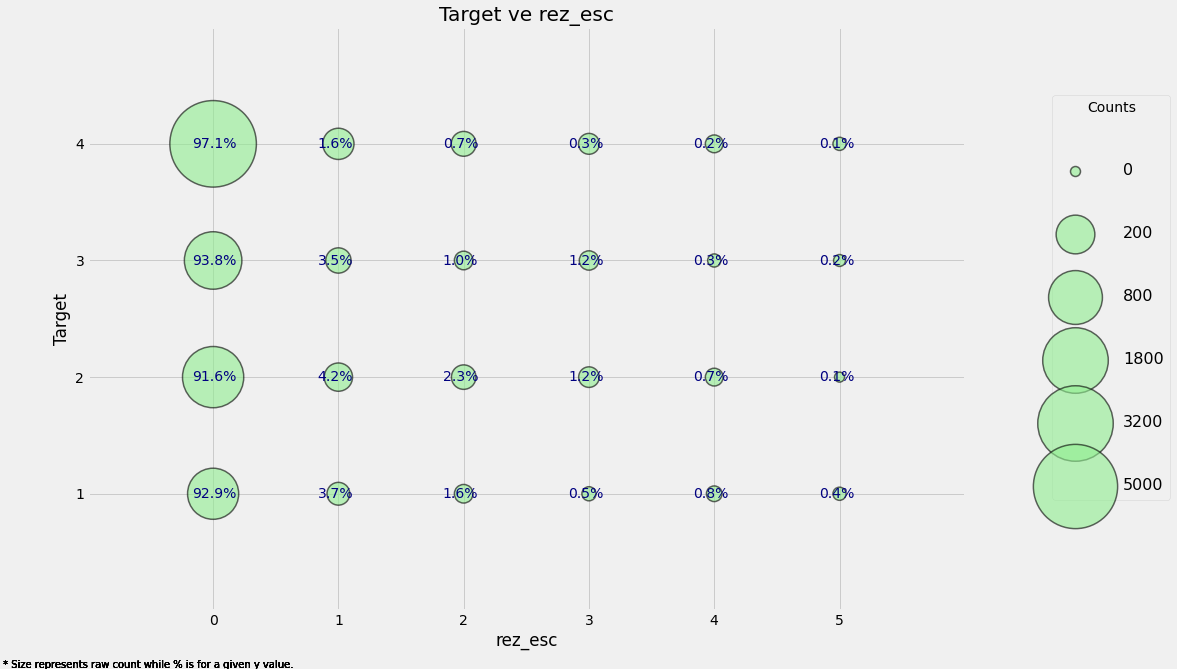

In [48]:
plot_categoricals('rez_esc', 'Target', data);

마커의 사이즈는 raw count를 나타냅니다. 플롯을 읽기 위해서 주어진 y 값을 선택한 이후 row를 가로질러 읽으세요. 예를 들면 빈곤 수준이 1인 경우 93%의 개인들이 years behind를 가지고 있지 않으며 전체 수는 약 800명입니다. 그리고  0.4%의 개인은 5 years behind이며 합계 50명 정도입니다. 이 플롯은 카테고리 내에 있는 전반적인 수와 비율을 보여주려고 시도합니다. 이는 완벽하지는 않지만 시도해 봤습니다.

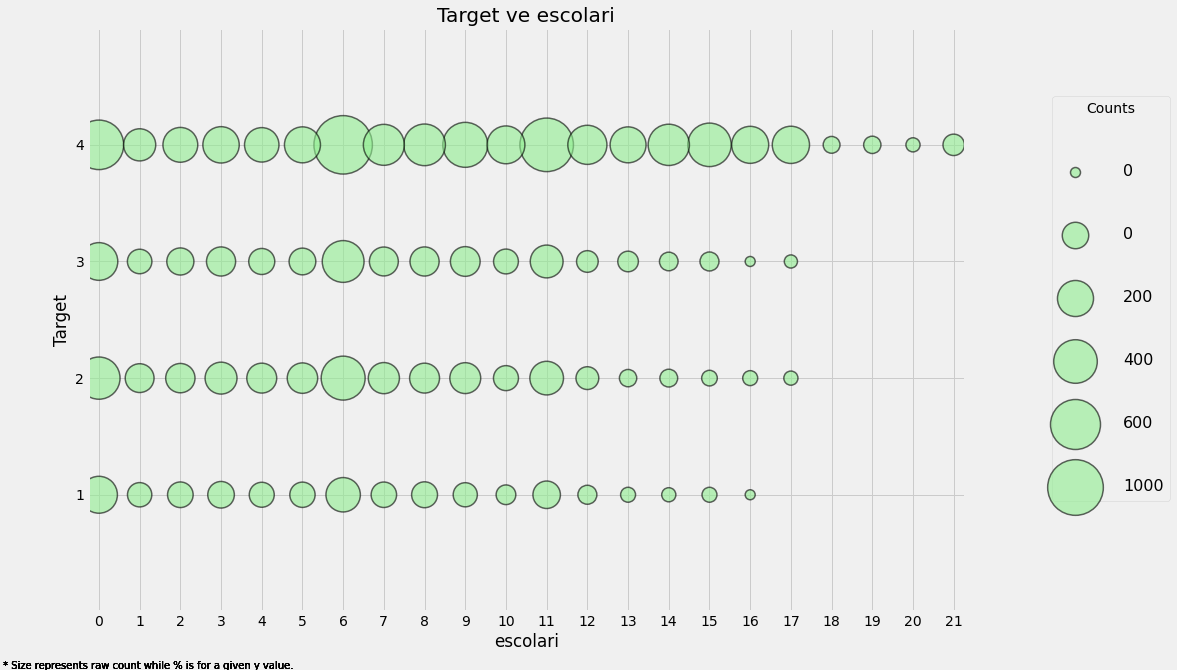

In [49]:
plot_categoricals('escolari', 'Target', data, annotate = False)

각 열의 남아있는 결측 값은 `imputation`이라고 알려져 있는 과정으로 채워질 것입니다. 흔히 사용되는 imputation의 몇 가지 타입이 있는데, 거정 효과적이며 간단한 방식은 컬럼의 `median`으로 결측치를 채우는 것입니다.

결측치를 채우는 마지막 단계로 우리는 이러한 값들이 사라진 경우에 대해서 타겟의 분포를 그릴 수 있습니다.

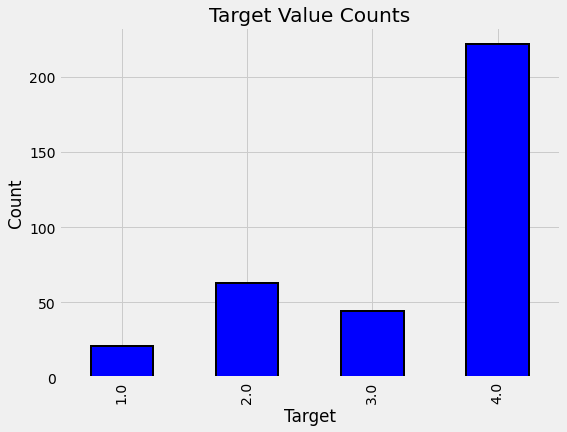

In [50]:
plot_value_counts(data[(data['rez_esc-missing'] == 1)], 'Target')

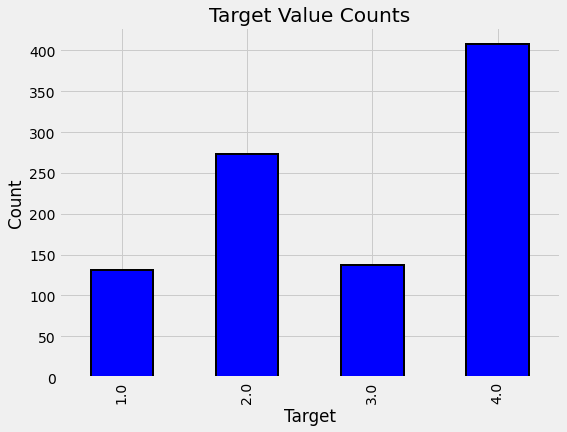

In [51]:
plot_value_counts(data[(data['v2a1-missing'] == 1)], 'Target')

이것은 더 많은 빈곤의 지표가 될 수 있는 것 같습니다. 보다 높은 2의 prevalence를 볼 때.  
  
**이것은 중요한 포인트를 나타냅니다.** 가끔은 결측 정보가 당신에게 주어진 정보만큼 중요할 수 있습니다.

# Feature Engineering

우리가 할 수 있는 EDA는 매우 많습니다. 하지만 첫 번째로 우리는 데이터를 가구의 수준으로 정리해 나가야 합니다. 우리는 이미 각 가구의 일정 정보들을 가지고 있지만 트레이닝에 있어서 각 가구에 대해 모든 요약된 정보가 필요할 것입니다. 이는 개인들을 가구 별로 그룹(`groupby`) 하고 개인의 변수들을 집계(`agg`) 하는 것을 의미합니다.

또 다른 노트북에서 자동화된 피처 엔지니어링을 사용하는 것을 보여줬습니다. 그리고 피처 엔지니어링은 머신러닝 워크플로우의 일반적인 파트이지민 지금은 우리는 이것을 손으로 할 것입니다. 하지만 **automated feature engineering in Featuretools**를 보길 권장합니다.

## Column Definitions

데이터 사이언스에 있어서 가끔 데이터를 파헤치거나 많은 시간이 걸리는 실증나는 작업을 해야한 하기에 손을 더럽혀야 합니다. 바로 이것이 분석에 있어 해당 파트입니다. 우리는 개인의 수준이나 가구의 수준인 컬럼을 정의해야만 합니다. data discriptions를 이용해서. 가구 수준의 변수를 식별하는 다른 방법은 없습니다. 그러므로 데이터 설명에 따라서 변수 자체를 살펴 봐야 합니다. 

우리는 다른 변수들을 정의할 것입니다. 왜냐하면 이들을 다른 방식으로 다루어야 할 필요가 있기 때문입니다. 각기 다른 수준으로 정의된 변수들이 있기 때문에 필요에 따라 이들을 집계하며 시작할 수 있습니다.

이 프로세스는 다음과 같습니다.

1. 변수를 가구 수준과 개인의 수준으로 쪼갠다.  
2. 개인 수준의 데이터에 적합한 집계(aggregations)를 찾아낸다.  
  * 순서형 변수는 통계적 집계를 사용할 수 있다.(statistical aggregations)  
  * Boolean 변수는 순서형 변수보다 더 적은 stats로 집계할 수 있다.  
3. 개인 집계들을 가구 수준의 데이터에 Join한다.

### Define Variable Categories

변수들의 몇 가지 다른 카테고리들이 있습니다.

1. Individual Variables: 이들은 가구라기 보다는 각 개인에 대해서 characteristics입니다.  
  * Boolean: Yes or No (0 or 1)
  * Ordered Discrete: Integers with an ordering  
2. Household variables  
  * Boolean: Yes or No
  * Ordered Discrete: Integers with an ordering  
  * Continuous numeric  
3. Squared Variables: derived from squaring variables in the data  
4. id variables: identifies the data and should not be used as features

아래 각 카테고리에 대해 손수 정의한 변수들이 있습니다. 이는 살짝 지루하지만 필요합니다.

In [52]:
id_ = ['Id', 'idhogar', 'Target']

In [53]:
ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone', 'rez_esc-missing']

ind_ordered = ['rez_esc', 'escolari', 'age']

In [54]:
hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2', 'v2a1-missing']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [55]:
sqr_ = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

모든 변수를 다루었고 어떤 변수도 반복하지 않았는지 확인해 봅시다.

In [57]:
from collections import Counter
Counter(sqr_)

Counter({'SQBage': 1,
         'SQBdependency': 1,
         'SQBedjefe': 1,
         'SQBescolari': 1,
         'SQBhogar_nin': 1,
         'SQBhogar_total': 1,
         'SQBmeaned': 1,
         'SQBovercrowding': 1,
         'agesq': 1})

In [58]:
list(Counter(sqr_))

['SQBescolari',
 'SQBage',
 'SQBhogar_total',
 'SQBedjefe',
 'SQBhogar_nin',
 'SQBovercrowding',
 'SQBdependency',
 'SQBmeaned',
 'agesq']

In [59]:
list(Counter(sqr_).values())

[1, 1, 1, 1, 1, 1, 1, 1, 1]

In [60]:
np.array(list(Counter(sqr_).values()))

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

In [62]:
x = ind_bool + ind_ordered + id_ + hh_bool + hh_ordered + hh_cont + sqr_

from collections import Counter

# np.all(조건) - 배열의 모든 데이터가 조건과 맞으면 True 하나라도 다르면 False

print('There are no repeats: ', np.all(np.array(list(Counter(x).values())) == 1))
print('We covered every variable: ', len(x) == data.shape[1])

There are no repeats:  True
We covered every variable:  True


**Squared Variables(제곱 변수)**

첫 번째, 가장 쉬운 단계: 우리는 모든 제곱 변수를 지울 것입니다. 가끔씩 변수들은 제곱되거나 변형됩니다. 피처 엔지니어링의 한 부분으로써. 왜냐하면 이는 선형 모델이 비선형 관계를 학습하는데 도움을 주기 때문입니다. 하지만 우리가 더욱 복잡한 모델을 사용하기 때문에 이러한 제곱 변수들은 불필요합니다. 이들은 non-squared version과 매우 상관관계가 높습니다. 그러므로 상관 없는 정보를 추가함으로써 모델을 망치고 학습을 느리게 합니다.  
  
예를 들어 `SQBage` vs `age`를 살펴 봅시다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


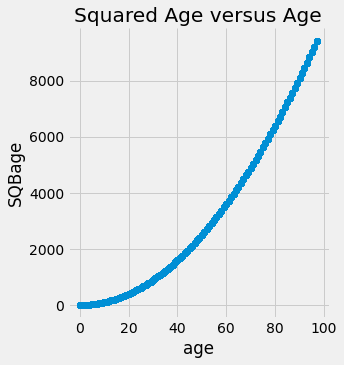

In [63]:
sns.lmplot('age', 'SQBage', data = data, fit_reg = False);
plt.title('Squared Age versus Age');

이러한 변수는 상관관계가 높습니다. 따라서 우리는 두개 다 유지할 필요가 없습니다.

In [64]:
# Remove squared variables
data = data.drop(columns = sqr_)
data.shape

(33413, 136)

### Id Variables

이들은 꽤 단순합니다: 이들은 데이터에 그대로 유지할 것입니다. 왜냐하면 신원 확인을 위해 필요하기 때문입니다.

### Household Level Variables

첫 번째로 세대주를 부분집합으로 한 다음 가구 수준의 변수들을 부분집합으로 합니다.

In [65]:
# 세대주 부분집합
heads = data.loc[data['parentesco1'] == 1, :]

# 가구 수준 부분집합
heads = heads[id_ + hh_bool + hh_cont + hh_ordered]
heads.shape

(10307, 99)

대부분의 가구 수준의 변수들의 경우 간단하게 이들을 그대로 보존할 수 있습니다.: 왜냐하면 각 가구에 대해서 예측을 원하기 때문에 이러한 변수들을 피처로써 사용합니다. 하지만 쓸모 없는 변수들을 지울 수 있으며 또한 기존에 존재하는 데이터로부터 나온 피처들을 추가할 수 있습니다.

### Redundant Household Variables

모든 가구 변수들 간의 상관관계를 살펴 봅시다. 만약 매우 상관관계가 높은 어떤 것이 있다면 상관관계가 높은 변수들의 쌍 중 하나를 제거할 수 있습니다.  
  
다음의 코드는 상관관계의 절대 량의 0.95보다 큰 변수들을 확인합니다.

In [66]:
# Create correlation matrix
corr_matrix = heads.corr()

# Select upper triangle of correlation matrix
# where(a>b, c, a): a에서 b보다 큰 것을 찾아서 c로 바꾸고 아니면 a로 놔둬라
# np.triu: 상삼각행렬(Upper triangular matrix를 반환)
# np.ones: 1로 가득찬 array 생성

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

이들은 상관관계가 있는 변수들의 각각의 쌍 중 하나를 보여줍니다. 다른 쌍을 찾으려면 `corr_matrix`를 부분집합으로 만들 수 있습니다.

In [67]:
corr_matrix.head()

,Target,hacdor,hacapo,v14a,refrig,paredblolad,paredzocalo,paredpreb,pisocemento,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,v2a1-missing,v2a1,dependency,edjefe,edjefa,meaneduc,overcrowding,rooms,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,v18q1,tamhog,tamviv,hhsize,hogar_nin,hogar_adul,hogar_mayor,hogar_total,bedrooms,qmobilephone
Target,1.000000,-0.136275,-0.096313,0.068230,0.119607,0.254469,-0.078851,-0.104545,-0.209131,-0.096893,-0.152979,-0.040128,-0.039861,0.005231,0.275452,0.016832,-0.054463,-0.114144,-0.103487,0.014357,0.032872,-0.026240,0.031516,0.295249,0.062961,-0.046518,-0.055818,0.021908,-0.009437,-0.051036,-0.007696,-0.049932,0.097592,-0.062316,-0.083835,-0.017669,-0.054739,0.158804,-0.083063,-0.162796,0.156930,-0.060286,-0.142433,-0.041221,NaN,0.023812,-0.208170,-0.162652,0.280947,-0.209181,-0.128644,0.261142,-0.217908,-0.174310,0.293540,-0.022316,0.131069,0.032834,-0.109057,-0.095326,0.173324,0.137407,0.175124,-0.019746,-0.085646,-0.084516,-0.079679,-0.047958,0.089509,-0.089509,-0.133152,0.161353,-0.126465,0.235687,0.052310,0.333652,-0.234954,0.201019,-0.186530,0.086395,-0.023307,-0.209479,-0.038193,-0.142157,-0.260917,0.036476,-0.111489,0.197493,-0.111557,-0.122554,-0.111557,-0.266309,0.127904,-0.025173,-0.111557,0.135203,0.168685
hacdor,-0.136275,1.000000,0.593867,-0.086701,-0.066409,-0.113787,0.026165,0.019816,0.110713,0.122610,0.068846,0.086632,-0.007015,-0.005960,-0.143259,-0.005960,0.026892,0.116650,0.026372,-0.036627,-0.007641,-0.008595,-0.006613,-0.148678,-0.036094,0.036627,0.005125,-0.004565,-0.003695,-0.002945,0.006355,0.064991,0.006987,-0.030309,0.053491,-0.007932,-0.012058,-0.035395,0.023407,0.033674,-0.060450,0.029765,0.051689,0.007229,-0.001652,-0.006817,0.146991,0.037738,-0.127219,0.112619,0.047893,-0.119760,0.151133,0.059861,-0.148503,-0.083256,-0.043135,0.046399,0.121261,0.072329,-0.054428,-0.041849,-0.054110,0.009782,0.027159,-0.008010,0.037814,0.030319,-0.009123,0.009123,0.116965,-0.019910,0.019191,-0.047917,-0.027628,-0.092837,0.620093,-0.197812,0.243406,0.050627,0.175272,0.219364,0.095605,0.191594,0.302703,0.099775,0.246122,-0.054685,0.246793,0.297433,0.246793,0.295757,0.043431,-0.058321,0.246793,-0.189177,0.026514
hacapo,-0.096313,0.593867,1.000000,-0.123276,-0.075336,-0.094350,0.022254,0.007634,0.089127,0.134901,0.042265,0.118369,-0.005219,-0.004434,-0.120922,-0.004434,-0.002458,0.115475,0.023931,-0.047382,-0.007023,-0.006394,-0.004920,-0.131246,-0.038001,0.035262,0.013710,-0.022503,-0.002749,0.002857,0.023222,0.105027,-0.013006,-0.027034,0.089556,-0.005901,0.002071,-0.028908,0.011194,0.042592,-0.056761,0.030683,0.045590,0.013695,-0.001229,-0.005071,0.133999,0.011774,-0.094734,0.112630,0.018830,-0.092966,0.153102,0.031874,-0.124185,-0.061334,-0.038374,0.030007,0.122973,0.050853,-0.039341,-0.035871,-0.055738,0.009390,0.029604,-0.005307,0.026064,0.041579,-0.012488,0.012488,0.097741,-0.019566,0.011497,-0.039651,-0.026451,-0.088360,0.467570,-0.200073,0.188811,0.056090,0.150316,0.170801,0.063220,0.140345,0.235222,0.082186,0.194963,-0.047469,0.195462,0.252206,0.195462,0.223288,0.046811,-0.043296,0.195462,-0.126525,0.036755
v14a,0.068230,-0.086701,-0.123276,1.000000,0.145417,0.065795,0.002527,0.007668,-0.020410,-0.128082,-0.068496,-0.034484,0.003483,0.002960,0.094633,0.002960,-0.057915,-0.140181,-0.076321,0.047145,0.012098,0.004268,0.003284,0.087430,0.169428,-0.110830,-0.178016,0.034658,0.001835,-0.096564,-0.000137,-0.460629,0.022767,0.082497,-0.135782,0.0

In [68]:
corr_matrix['tamhog'].abs() > 0.9

Target          False
hacdor          False
hacapo          False
v14a            False
refrig          False
                ...  
hogar_adul      False
hogar_mayor     False
hogar_total      True
bedrooms        False
qmobilephone    False
Name: tamhog, Length: 97, dtype: bool

In [69]:
corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9]

,r4t3,tamhog,tamviv,hhsize,hogar_total
r4t3,1.000000,0.998287,0.910457,0.998287,0.998287
tamhog,0.998287,1.000000,0.909155,1.000000,1.000000
tamviv,0.910457,0.909155,1.000000,0.909155,0.909155
hhsize,0.998287,1.000000,0.909155,1.000000,1.000000
hogar_total,0.998287,1.000000,0.909155,1.000000,1.000000


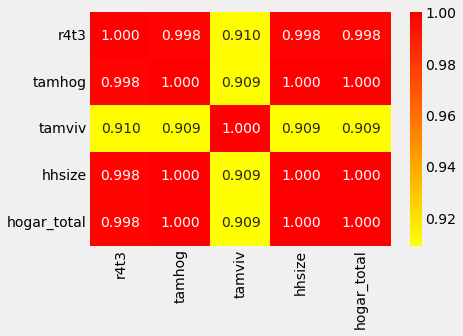

In [70]:
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9],
                   annot = True, cmap = plt.cm.autumn_r, fmt='.3f');

집의 크기와 관계가 있는 몇 가지 변수들이 있습니다.  
* r4t3, Total persons in the household  
* tamhog, size of the household  
* tamviv, number of persons living in the household  
* hhsize, household size  
* hogar_total, # of total individuals in the household

이러한 변수들은 서로 높은 상관관계가 있습니다. 사실 `hhsize`는 `tamhog`, `hogar_total`과 완전한 상관관계가 있습니다. 이 두 변수들을 제거할 것입니다. 왜냐하면 정보가 필요 없기 때문입니다. 또한 `r3t3`도 지울 수 있는데 이는 `hhsize`와 거의 상관관계가 완벽하기 때문입니다.

`tamviv`는 `hhsize`와 필수적으로 같지는 않습니다. 왜냐하면 가정에 살지 않는 가족 구성원이 있을 수 있기 때문입니다. scatterplot을 이용해 시각화를 해봅시다.

In [71]:
heads = heads.drop(columns = ['tamhog', 'hogar_total', 'r4t3'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


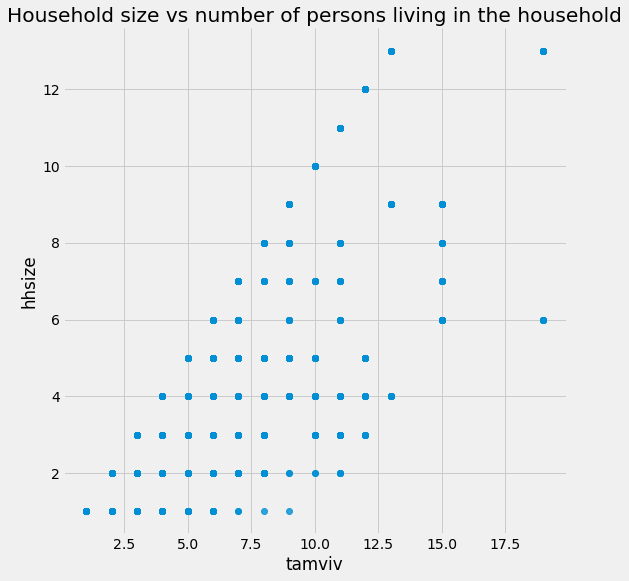

In [72]:
sns.lmplot('tamviv', 'hhsize', data, fit_reg=False, size = 8);
plt.title('Household size vs number of persons living in the household');

여러가지 경우를 볼 수 있습니다. 가족 보다 가정에 사는 사람이 많습니다. 이는 새로운 피처를 만드는데 좋은 아이디어를 줍니다.: **이러한 두 측정치 사이의 차이점**

In [93]:
heads['tamviv'].unique()

array([ 1,  4,  2,  3,  5,  6, 10,  7,  9, 11,  8, 13, 12, 15, 19])

In [86]:
heads['hhsize'].unique().

array([ 1,  4,  2,  3,  5,  6, 10,  7,  9, 11,  8, 13, 12])

In [94]:
# 가족 구성원 수 - 집의 사이즈 -> 클 수록 구성원 대비 집의 면적이 넓다는 뜻임
heads['hhsize-diff'] = heads['tamviv'] - heads['hhsize']
heads['hhsize-diff'].unique()

array([ 0,  2,  3,  1,  4,  5,  6,  7,  9, 13,  8])

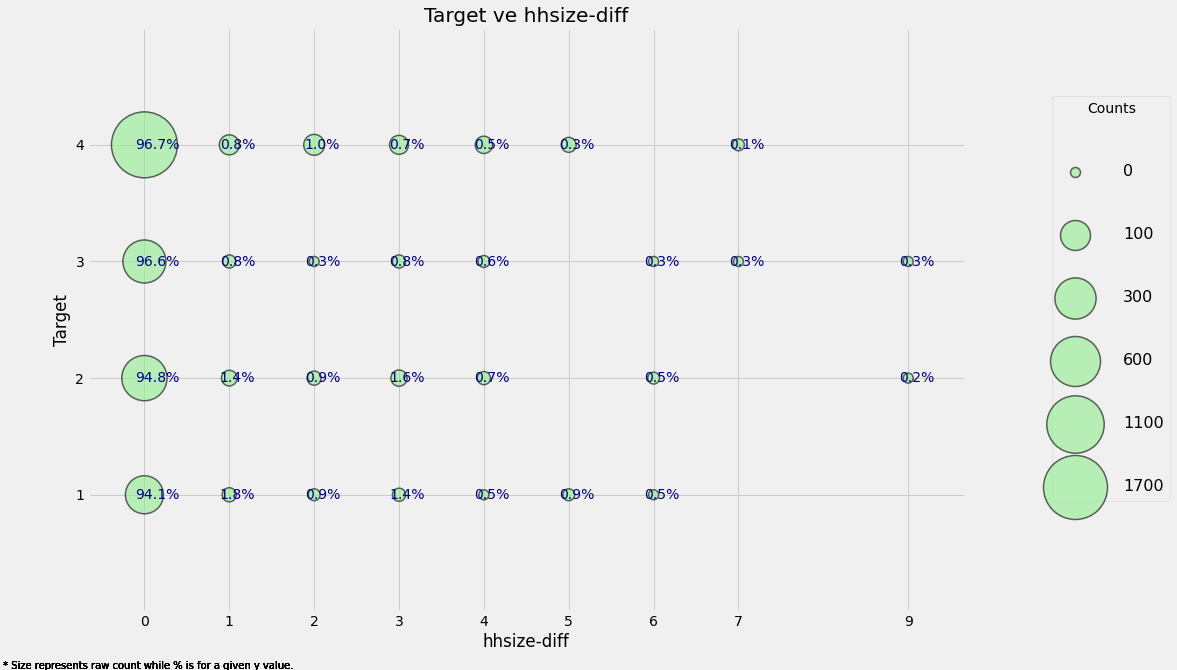

In [73]:
heads['hhsize-diff'] = heads['tamviv'] - heads['hhsize']
plot_categoricals('hhsize-diff', 'Target', heads)

대부분의 가구가 차이점을 보이지는 않다고 하더라도 가족의 멤버 보다 가정에 사는 사람들이 많은 경우가 소수 있습니다.  
  
다른 불필요한 변수로 계속해 봅시다. `coopele`를 살펴볼 수 있습니다.

In [74]:
corr_matrix.loc[corr_matrix['coopele'].abs() > 0.9, corr_matrix['coopele'].abs() > 0.9]

,public,coopele
public,1.000000,-0.967759
coopele,-0.967759,1.000000


해당 변수는 집에 있는 전기가 어디서 오는지를 가리킵니다. 네가지 옵션이 있으며 이러한 옵션 중 `noelec`은 전기가 없으며 `planpri`는 개인 발전소에서 전기를 얻는 것, 즉 전기가 없는 것입니다.

**Creating Ordinal Variable**

이 네 개의 변수들을 압축해 하나로 만들어 순서형 변수를 만들 것입니다. data description에 기반해 매핑을 선택할 것입니다.

0: No electricity  
1: Electricity from cooperative  
2: Electricity from CNFL, ICA, ESPH/JASEC  
3: Electricity from private plant

순서형 변수는 내제된 순서를 가지고 있으며 이를 위해 도메인 지식에 기반해 우리 것을 선택할 것입니다. 이 새로운 순서형 변수를 만든 후에 네 개의 다른 것들을 지울 수 있습니다. 이 변수들이 없는 몇 가구들이 있는데 따라서 `nan`을 쓸 것이며 해당 변수의 측정치가 없다는 것을 가리키는 Boolean 컬럼을 추가할 것입니다.

In [75]:
elec = []

# Assign values
for i, row in heads.iterrows():
  if row['noelec'] == 1:
    elec.append(0)
  elif row['coopele'] == 1:
    elec.append(1)
  elif row['public'] == 1:
    elec.append(2)
  elif row['planpri'] == 1:
    elec.append(3)
  else:
    elec.append(np.nan)

# Record the new variable and missing flag
heads['elec'] = elec
heads['elec-missing'] = heads['elec'].isnull()

# Remove the electricity columns
# heads = heads.drop(columns = ['noelect', 'coopele', 'public', 'planpri'])

In [96]:
heads.shape

(10307, 98)

In [97]:
len(elec)

10307

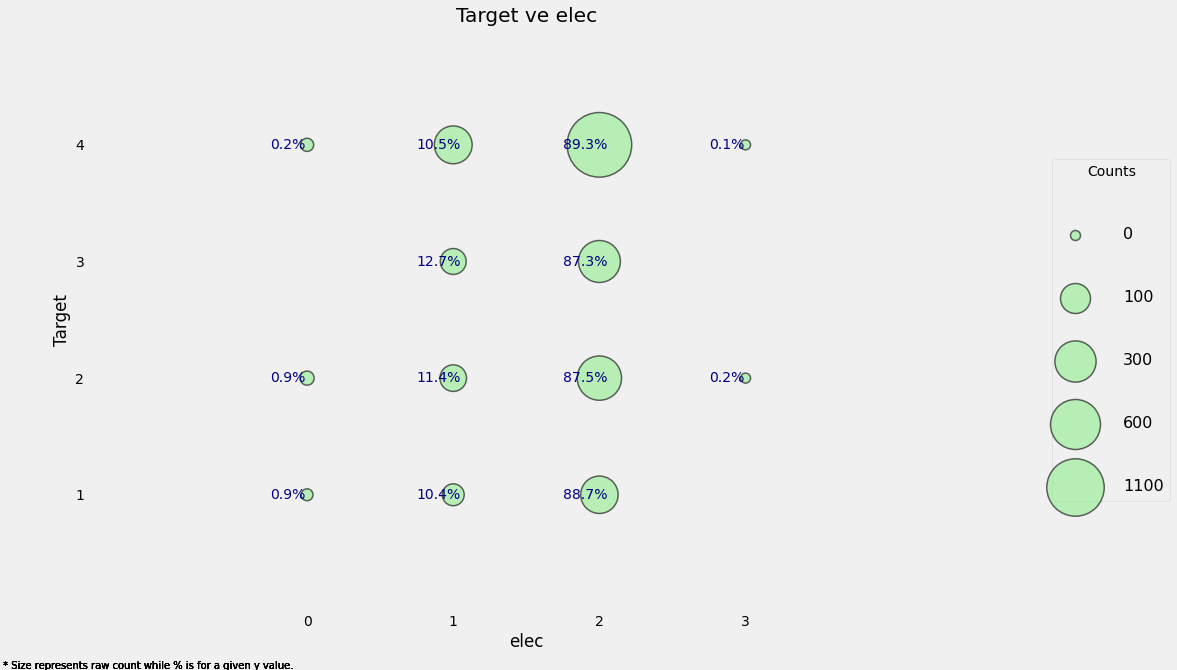

In [76]:
plot_categoricals('elec', 'Target', heads)

# 0: No electricity  
# 1: Electricity from cooperative  
# 2: Electricity from CNFL, ICA, ESPH/JASEC  
# 3: Electricity from private plant

타겟의 모든 값들에 대해 알수 있습니다. 가장 흔한 전기의 근원은  등록된 공급자로부터 옵니다.

마지막 불필요한 컬럼은 `area2`입니다. 이는 집이 시골에 있는지를 의미합니다. 하지만 이는 불필요한데 집이 도시에 있는지를 가리키는 컬럼을 가지고 있기 때문입니다. 그러므로 해당 컬럼을 지울 수 있습니다.

In [77]:
heads = heads.drop(columns = 'area2')

heads.groupby('area1')['Target'].value_counts(normalize = True)

area1  Target
0      4.0       0.582249
       2.0       0.176331
       3.0       0.147929
       1.0       0.093491
1      4.0       0.687030
       2.0       0.137688
       3.0       0.108083
       1.0       0.067199
Name: Target, dtype: float64

도시에 있는 가구는 시골 지역에 있는 가구에 비해더 낮은 빈곤 수준을 갖는듯 합니다.(value of 0)

### Creating Ordinal Variables

집의 벽, 지붕, 계단의 경우 각각 세 개의 컬럼이 있습니다. 첫 번째는 'bad'를 가리키며 두번째는 'regular' 그리고 세번째는 'good'입니다. 이들을 boolean으로 놔둘 수 있지만 이들은 내제된 순서를 가지고 있기 때문에 순서형 변수로 변환하는 것이 말이 되는 것 같습니다. 이를 위해서 어떤 컬럼이든지 `np.argmax`를 사용해 각 가구에 대해 어떤 컬럼이든지 non-zero인 것을 간단하게 찾을 수 있습니다.

In [101]:
np.array(heads[['epared1', 'epared2', 'epared3']])

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

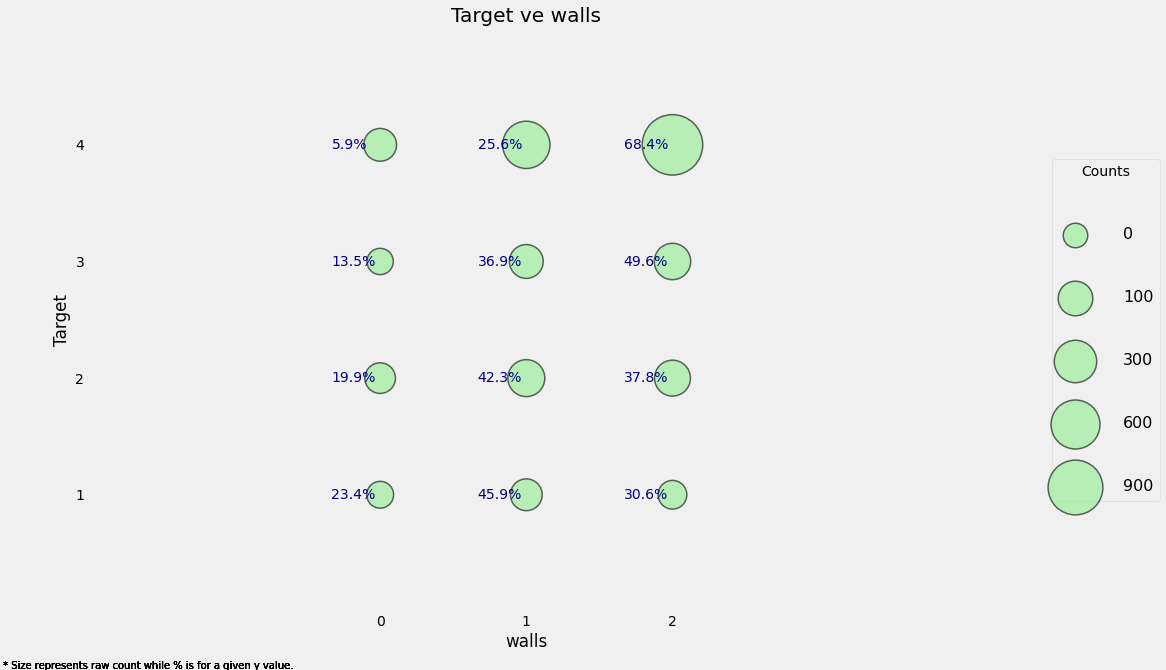

In [78]:
# Wall ordinal variable
# np.argmax: 주어진 배열에서 가장 높은 값을 가진 값의 인덱스를 반환합니다.
heads['walls'] = np.argmax(np.array(heads[['epared1', 'epared2', 'epared3']]), axis = 1)

# heads = heads.drop(columns = ['epared1', 'epared2', 'epared3'])
plot_categoricals('walls', 'Target', heads)

In [79]:
# Roof ordinal variable
heads['roof'] = np.argmax(np.array(heads[['etecho1', 'etecho2', 'etecho3']]), axis = 1)
heads = heads.drop(columns = ['etecho1', 'etecho2', 'etecho3'])

# Floor ordinal variable
heads['floor'] = np.argmax(np.array(heads[['eviv1', 'eviv2', 'eviv3']]), axis = 1)
# heads = heads.drop(columns = ['eviv1', 'eviv2', 'eviv3'])

In [98]:
heads['floor'].unique()

array([0, 1, 2])

## Feature Construction

변수들을 순서형 변수에 매핑하는 것에 더해서 기존에 존재하는 데이터로부터 완전히 새로운 피처를 만들 수 있습니다. 이것은 feature construction으로 알려져 있습니다. 예를 들어 우리는 이전의 세 피처를 더할 수 있습니다. 우리는 방금 집 구조 품질의 전반적인 측정을 하기 위해 만들어 냈습니다.

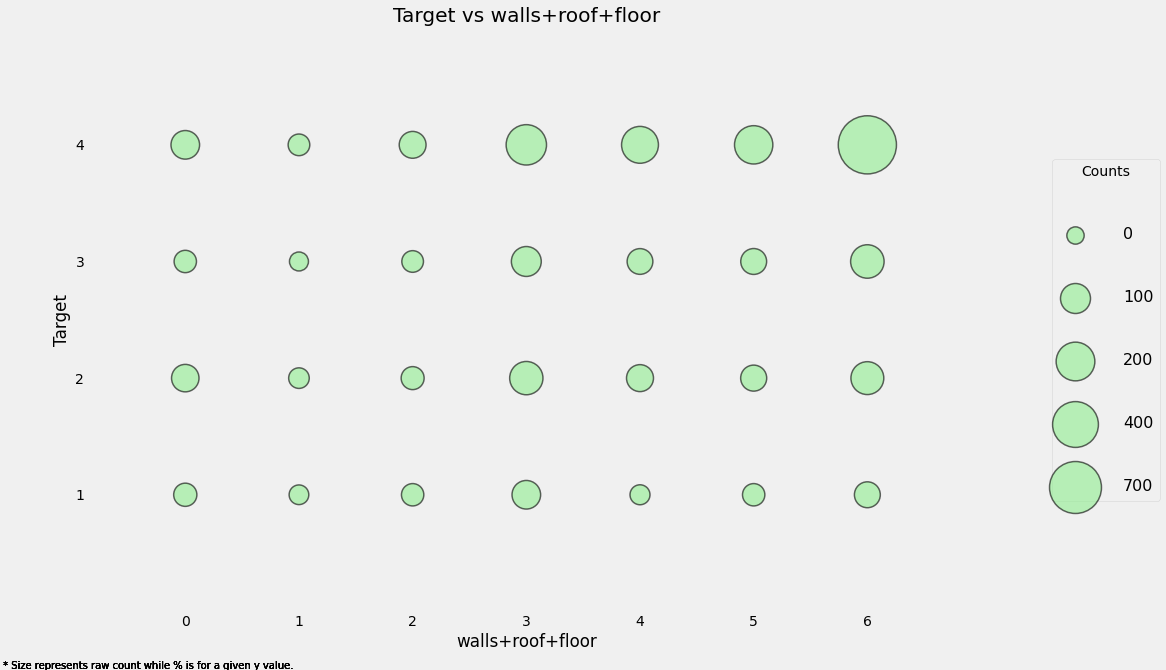

In [102]:
# Create new feature
heads['walls+roof+floor'] = heads['walls'] + heads['roof'] + heads['floor']

plot_categoricals('walls+roof+floor', 'Target', heads, annotate=False)

이 새로운 피처는 아마 유용할 것입니다. 왜냐하면 타겟 4가 'house quality' 변수의 값이 더 높은 경향을 갖는듯 하기 때문입니다. 또한 우리는 세부적인 디테일을 알기 위해 이를 테이블로 살펴볼 수 있습니다.

In [107]:
pd.DataFrame(heads.groupby(['walls+roof+floor'])['Target'].value_counts(normalize = False))

Target
walls+roof+floor Target        
0                4.0         67
                 2.0         57
                 1.0         29
                 3.0         25
1                4.0         22
                 2.0         18
                 1.0         15
                 3.0         13
2                4.0         52
                 2.0         28
                 1.0         25
                 3.0         22
3                4.0        266
                 2.0        123
                 3.0         80
                 1.0         67
4                4.0        185
                 2.0         53
                 3.0         44
                 1.0         16
5                4.0        216
                 2.0         46
                 3.0         45
                 1.0         25
6                4.0       1146
                 3.0        126
                 2.0        117
                 1.0         45

In [106]:
counts = pd.DataFrame(heads.groupby(['walls+roof+floor'])['Target'].value_counts(normalize = True)).rename(columns = {'Target': 'Normalized Count'}).reset_index()
counts.head()

,walls+roof+floor,Target,Normalized Count
0,0,4.0,0.376404
1,0,2.0,0.320225
2,0,1.0,0.162921
3,0,3.0,0.140449
4,1,4.0,0.323529


다음 변수는 집의 품질에 대한 `warning`이 될 것입니다. 이는 화장실, 전기, 계단,  수도 서비스, 천장 등이 없는 각각에 대해 -1 포인트로 네거티브 값이 될 것입니다.

In [110]:
# No toilet, no electricity, no floor, no water service, no ceiling
heads['warning'] = 1 * (heads['sanitario1'] + (heads['elec'] == 0) + heads['pisonotiene'] + heads['abastaguano'] + (heads['cielorazo'] == 0))
heads['warning'].unique()

array([0, 1, 2, 3, 4])

계속해서 `plot_categoricals` 함수를 써서 이러한 상관관계를 시각화할 수 있습니다. 하지만 `seaborn` 또한 카테고리컬에 대해 효과적인 많은 plotting options를 가지고 있습니다. 하나는 `violinplot`인데 이는 변수의 분포를 보여줍니다. y축 위에는 각 플롯의 넓이를 보여주는데 이는 각 카테고리 관측치의 수입니다.

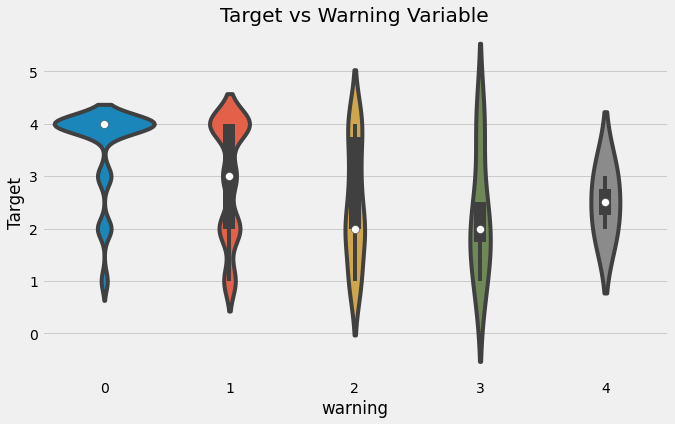

In [111]:
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'warning', y = 'Target', data = heads);
plt.title('Target vs Warning Variable');

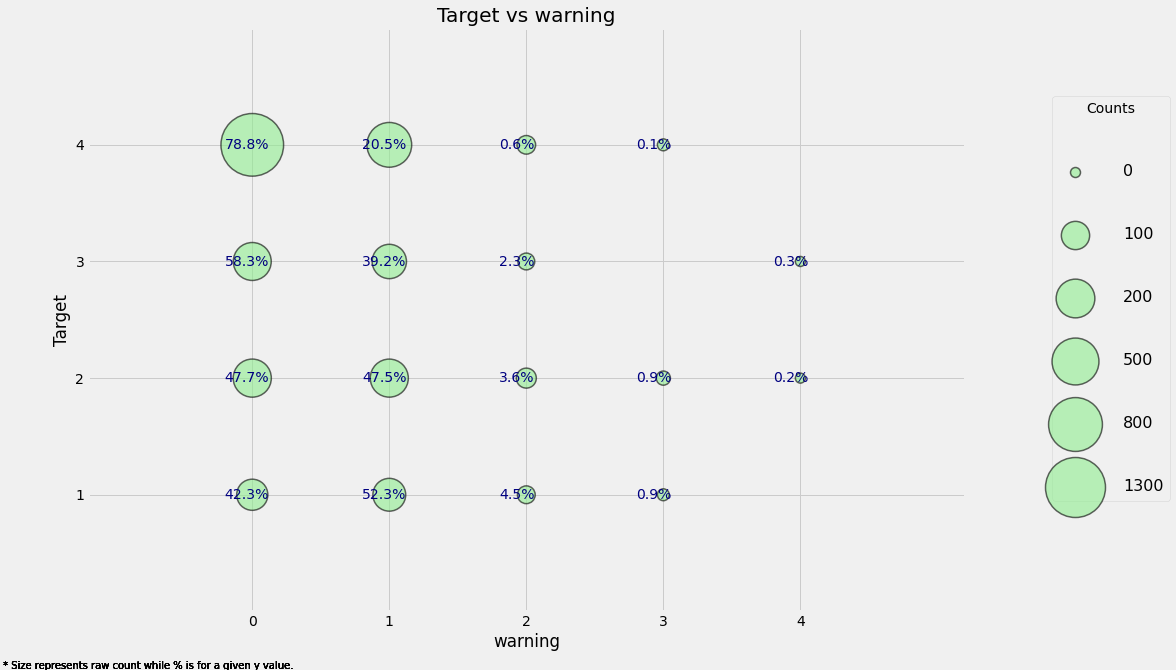

In [112]:
plot_categoricals('warning', 'Target', data = heads)

여기서 바이올린 플롯은 좋지 않습니다. 왜냐하면 바이올린 플롯은 카테고리컬 변수를 smooth out 하기 때문입니다. 이는 마치 타겟이 실제보다 낮거나 높은 값을 취할 수 있는 것처럼 보이는 효과입니다. 그렇더라도 warning signs가 없고 가장 낮은 빈곤 수준을 가진 가구의 높은 집중도를 볼 수 있습니다. 이는 유용한 피처처럼 보이지만 모델링을 하기 전까지는 확실하게 알 수 없습니다.

우리가 방금 만들 수 있는 이 마지막 가구 피처는 `bonus`입니다. 여기서 가족은 냉장고, 컴퓨터, 태블릿, 텔레비전을 갖는 것에 대해 점수를 얻습니다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


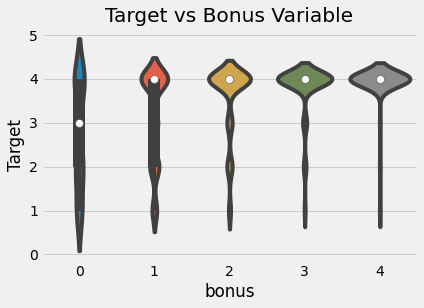

In [113]:
# Owns a refrigerator, computer, tablet, and television
heads['bonus'] = 1 * (heads['refrig'] + heads['computer'] + (heads['v18q1'] > 0) + heads['television'])

sns.violinplot('bonus', 'Target', data = heads, figsize = (10, 6));
plt.title('Target vs Bonus Variable');

## Per Capita Features

우리가 만들 수 있는 추가적인 피처는 가구에 있는 각 사람에 대한 특정 측정치의 수를 계산한 것입니다.

In [114]:
# 가구의 핸드폰 개수 / 구성원 수
heads['phones-per-capita'] = heads['qmobilephone'] / heads['tamviv']

heads['tablets-per-capita'] = heads['v18q1'] / heads['tamviv']
heads['rooms-per-capita'] = heads['rooms'] / heads['tamviv']
heads['rent-per-capita'] = heads['v2a1'] / heads['tamviv']

## Exploring Household Variables

피처를 정리하는데 많은 고생을 한 이후 이제 이들을 타겟과의 관계로 살펴볼 수 있습니다. 이미 조금은 했지만 지금은 관계를 수량화하려고 노력할 수 있습니다.

### Measuring Relationships

두 변수 사이의 관계를 측정하는 방법은 매우 많습니다. 우리가 탐색할 두 가지가 있습니다.  
1. The Pearson Correlation: 두 변수의 선형 관계를 -1부터 1까지 측정  
2. The Pearman Correlation: 두 변수의 monotonic(증가 또는 감소를 계속하는 함수) 관계를 -1부터 1까지 측정

In [116]:
from scipy.stats import spearmanr

In [120]:
def plot_corrs(x, y):
  """ Plot data and show the spearman and pearson correlation."""

  # Calculate correlations
  spr = spearmanr(x, y).correlation
  pcr = np.corrcoef(x, y)[0, 1]

  # Scatter plot
  data = pd.DataFrame({'x': x, 'y': y})
  plt.figure(figsize = (6, 4))
  sns.regplot('x', 'y', data = data, fit_reg = False);
  plt.title(f'Searman: {round(spr, 2)}; Pearson: {round(pcr, 2)}');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


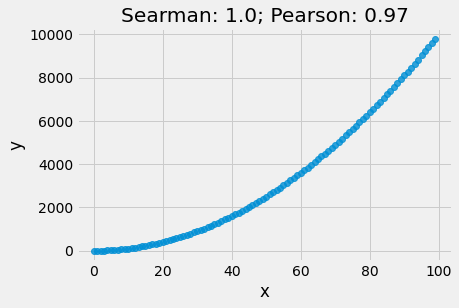

In [121]:
x = np.array(range(100))
y = x**2

plot_corrs(x, y)

Spearman correlation은 종종 순서형 변수에 대해서 더 낫다고 생각됩니다.예를 들어 Tartget이나 years of education과 같은 것에 대해. 현실 세계의 대부분의 상관관계는 선형이 아니며 pearson correlation이 두 변수들이 얼마나 관계가 있는지 근사할 수 있다고 하지만 이는 부정확하며 비교하는데 가장 좋은 도구는 아닙니다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


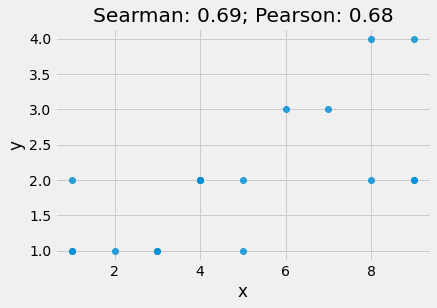

In [122]:
x = np.array([1, 1, 1, 2, 3, 3, 4, 4, 4, 5, 5, 6, 7, 8, 8, 9, 9, 9])
y = np.array([1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 3, 3, 2, 4, 2, 2, 4])

plot_corrs(x, y)

대부분의 경우 값은 매우 비슷합니다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


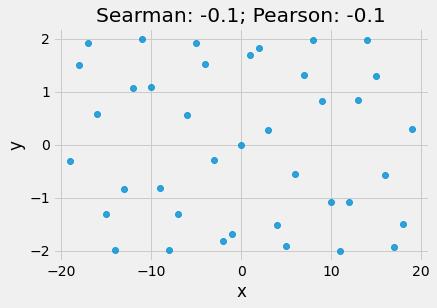

In [125]:
x = np.array(range(-19, 20))
y = 2 * np.sin(x)

plot_corrs(x, y)

첫 번째로 우리는 Target의 모든 변수에 대해 Pearson correlation을 계산할 것입니다.

In [127]:
# Use only training data
train_heads = heads.loc[heads['Target'].notnull(), :].copy()

pcorrs = pd.DataFrame(train_heads.corr()['Target'].sort_values()).rename(columns = {'Target': 'pcorr'}).reset_index()
pcorrs = pcorrs.rename(columns = {'index': 'feature'})

print('Most negatively correlated variables:')
print(pcorrs.head())

print('\nMost positively correlated variables:')
print(pcorrs.dropna().tail())

Most negatively correlated variables:
        feature     pcorr
0       warning -0.301791
1     hogar_nin -0.266309
2          r4t1 -0.260917
3  overcrowding -0.234954
4         eviv1 -0.217908

Most positively correlated variables:
               feature     pcorr
97   phones-per-capita  0.299026
98               floor  0.307605
99    walls+roof+floor  0.332446
100           meaneduc  0.333652
101             Target  1.000000


음의 상관관계에 대해 변수를 증가시킴에 따라 Target은 감소하며 이는 가난의 수준이 증가함을 의미합니다. 그러므로 `warning`이 증가함에 따라 가난의 수준 또한 증가하고 이는 말이 됩니다. 왜냐하면 이것이 집에 대해 잠재적으로 나쁜 징후를 보여주기 때문입니다. `hogar_nin`가정에 있는 자녀의 수(0 - 19)를 나타내는데 이 또한 말이 됩니다. 나이가 어린 아이는 가족에게 재정적 스트레스의 원인이 될 수 있습니다. 이는 가난의 수준을 높입니다. 또는, 낮은 수준의 사회경제적 지위를 가진 가족은 아이 중 한명이 성공할 수 있을 것이라는 희망에 차서 더 많은 아이를 가집니다. 설명이 무엇이든지 가족의 크기와 가난 사이의에 대한 링크가 존재합니다.  
https://www.adb.org/sites/default/files/publication/157217/adbi-rp68.pdf

반면에 양의 상관관계의 경우 높은 값은 Target의 높은 값을 의미합니다. 이는 가난의 수준이 낮아짐을 의마힙니다. 가구의 변수 수준이 가장 높게 상관되는 것은 `meaneduc`입니다. 이는 가구의 어륻들의 평균 교육 수준입니다. 이 교육과 가난 사이의 상관관계는 직관적으로 말이 됩니다. 우리는 어떤 원인이 어떤 것인이 반드시 알 수는 없지만 이것이 같은 방향으로 움직이는 것을 알고 있습니다.

상관관계 값에 대한 전반적인 가이드라인이 아래에 있지만 누구에게 묻느냐에 따라서 달라질 수 있습니다.  
* .00 - .19 "very weak"  
* .20 - .39 "weak"  
* .40 - .59 "moderate"  
* .60 - .79 "strong"  
* .80 - 1.0 "very strong"

이 상관관계가 보여주는 것은 일부 약한 상관관계가 있다는 것입니다. 그러므로 우리의 모델이 feature을 Target으로 mapping을 배우는데 사용할 수 있기를 바랍니다.  
  
이제 Spearman correlation을 계속해서 진행할 수 있습니다.

In [141]:
feats = []

for c in heads:
  # Only valid for numbers
  if heads[c].dtype != 'object':
    feats.append(c)
feats[:5]

['Target', 'hacdor', 'hacapo', 'v14a', 'refrig']

In [147]:
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

feats = []
scorr = []
pvalues = []

# Iterate through each column
for c in heads:
  # Only valid for numbers
  if heads[c].dtype != 'object':
    feats.append(c)

    # Calculate spearnam correlation
    scorr.append(spearmanr(train_heads[c], train_heads['Target']).correlation)
    pvalues.append(spearmanr(train_heads[c], train_heads['Target']).pvalue)

scorrs = pd.DataFrame({'feature': feats, 'scorr': scorr, 'pvalue': pvalues}).sort_values('scorr')

In [148]:
spearmanr(train_heads['hacdor'], train_heads['Target']).correlation

-0.13105936572609272

Spearman correlation 상관계수 계산은 `pvalue`와 함께 다닙니다. pvalue는 관계 수준의 중요성을 나타냅니다. 0.05보다 작은 어떤 `pvalue`는 일반적으로 중요하다고 여겨집니다. 비록 우리가 여러가지 비교를 하기 때문에 수 많은 비교들로 p-value를 나누길 원하지만, 프로세스는 Bonferroni correlation으로 알려져 있습니다.

In [149]:
print('Most negative Spearman correlations:')
print(scorrs.head())
print('\nMost positive Searman correlations:')
print(scorrs.dropna().tail())

Most negative Spearman correlations:
       feature     scorr        pvalue
97     warning -0.307326  4.682829e-66
68  dependency -0.281516  2.792620e-55
85   hogar_nin -0.236225  5.567218e-39
80        r4t1 -0.219226  1.112230e-33
49       eviv1 -0.217803  2.952571e-33

Most positive Searman correlations:
              feature     scorr        pvalue
23          cielorazo  0.300996  2.611808e-63
95              floor  0.309638  4.466091e-67
99  phones-per-capita  0.337377  4.760104e-80
96   walls+roof+floor  0.338791  9.539346e-81
0              Target  1.000000  0.000000e+00


대부분의 파트에 있어 상관관계를 계산하는 두 가지 방법들이 일치합니다.

In [150]:
corrs = pcorrs.merge(scorrs, on = 'feature')
corrs['diff'] = corrs['pcorr'] - corrs['scorr']

corrs.sort_values('diff').head()

,feature,pcorr,scorr,pvalue,diff
77,rooms-per-capita,0.152185,0.223303,6.521453e-35,-0.071119
85,v18q1,0.197493,0.244200,1.282664e-41,-0.046708
87,tablets-per-capita,0.204638,0.248642,3.951568e-43,-0.044004
2,r4t1,-0.260917,-0.219226,1.112230e-33,-0.041691
97,phones-per-capita,0.299026,0.337377,4.760104e-80,-0.038351


In [152]:
corrs.sort_values('diff').dropna().tail()

,feature,pcorr,scorr,pvalue,diff
57,techozinc,0.014357,0.003404,8.528369e-01,0.010954
49,hogar_mayor,-0.025173,-0.041722,2.290994e-02,0.016549
88,edjefe,0.235687,0.214736,2.367521e-32,0.020951
66,edjefa,0.052310,0.005114,7.804715e-01,0.047197
17,dependency,-0.126465,-0.281516,2.792620e-55,0.155051


상관관계에 있어 가장 큰 차이는 `dependency`입니다. `Target`대 `dependency`의 스캐터플롯을 그려 상관관계를 시각화할 수 있습니다. 플롯에 jitter을 조금 추가하겠습니다. 이들은 둘 다 이산형 변수이기 때문입니다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


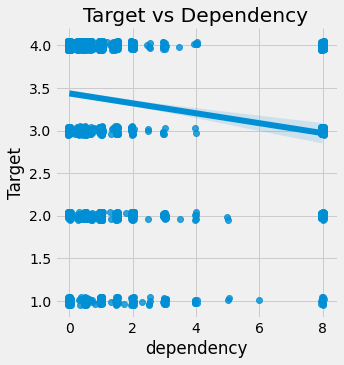

In [154]:
# jitter은 약간의 노이즈를 추가하는 파라미터
sns.lmplot('dependency', 'Target', fit_reg = True, data = train_heads, x_jitter = 0.05, y_jitter = 0.05);
plt.title('Target vs Dependency');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


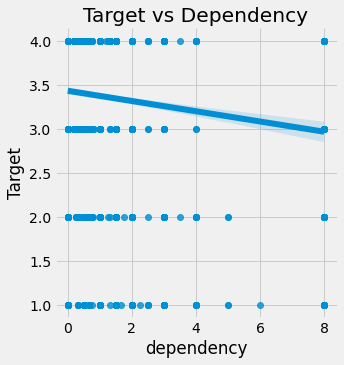

In [155]:
sns.lmplot('dependency', 'Target', fit_reg = True, data = train_heads);
plt.title('Target vs Dependency');

상관관계를 보기 어렵지만 약간 네거티브입니다. `dependency`가 증가함에 따라 `Target`의 값은 감소합니다. 이는 말이 됩니다. `dependency`는 (의존적인 개인의 수 / 비의존적인 개인의 수) 입니다. 이 값을 증가시킴에 따라 빈곤의 수준은 증가하는 경향이 있습니다. 더 많은 의존적인 가족 구성원을 갖는 것은 높은 가난 수준을 이끌어냅니다. 왜냐하면 그들은 의존적이지 않은 가족 구성원에게 지원을 받아야 하기 때문입니다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


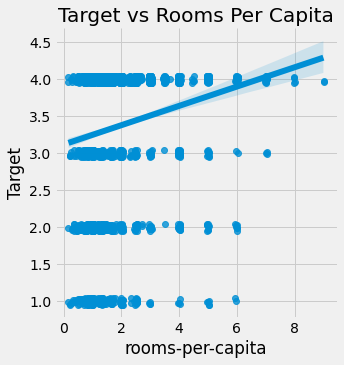

In [157]:
sns.lmplot('rooms-per-capita', 'Target', fit_reg = True, data = train_heads, x_jitter = 0.05, y_jitter = 0.05);
plt.title('Target vs Rooms Per Capita');

**Correlation Heatmap**  
내가 좋아하는 플롯 중 하나는 상관관계 히트맵입니다. 이는 하나의 이미지로 많은 정보를 보여주기 때문입니다. 히트맵의 경우 7개의 변수를 선택한 이후 target과 변수들 스스로의 상관관계를 볼 것입니다.

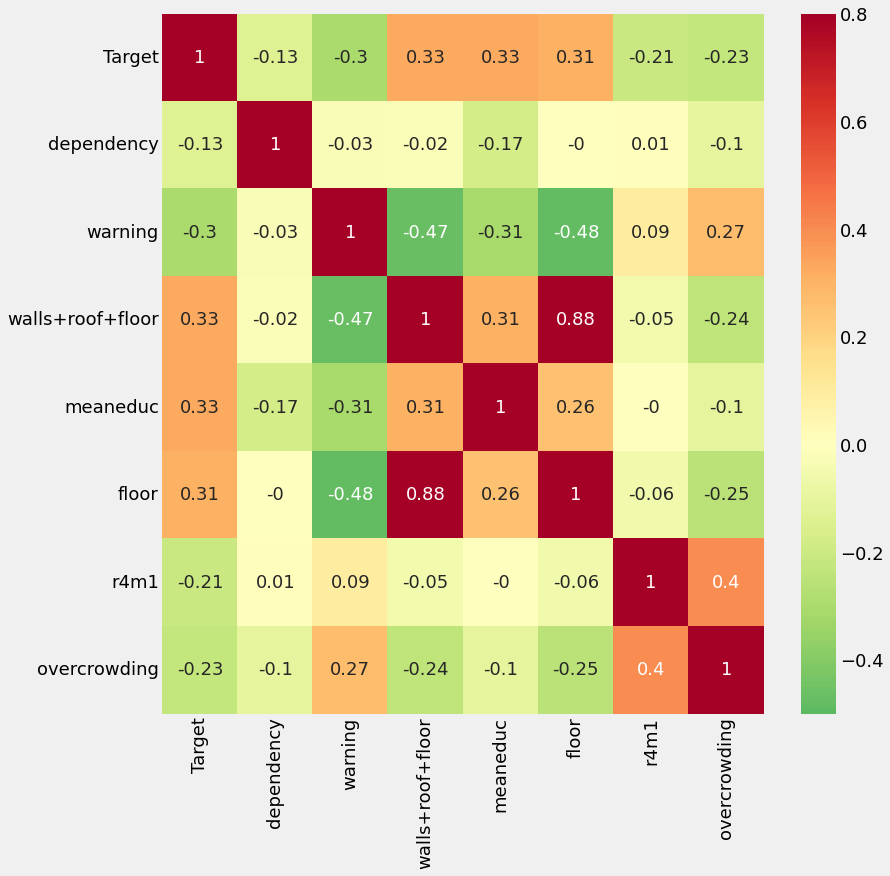

In [165]:
variables = ['Target', 'dependency', 'warning', 'walls+roof+floor', 'meaneduc', 'floor', 'r4m1', 'overcrowding']

# Calculate the crrelations
corr_mat = train_heads[variables].corr().round(2)

# Draw a correlation heatmap
plt.rcParams['font.size'] = 18
plt.figure(figsize = (12, 12))
sns.heatmap(corr_mat, vmin = -0.5, vmax = 0.8, center = 0,
                    cmap = plt.cm.RdYlGn_r, annot = True);

이 플롯은 `Target`과 낮은 상관관계를 갖는 많은 변수들을 보여줍니다. 또한 높은 일부 변수들간에 높은 상관관계도 있습니다.(예를 들어`floor`과 `walls+roof+floor`) 이러한 높은 상관관계는 공선성 때문에 문제가 될 수 있습니다.

**Features Plot**  
가구 수준 데이터의 마지막 탐색에서 우리는 `Target`과 가장 높은 상관관계를 가지는 일부를 plot할 수 있습니다. 이는 윗쪽 삼각형에는 스캐터 플롯을, 대각선에는 kernel density estimate(kde) 플롯을, 그리고 밑의 삼각형에는 2D KDE plots을 보여줍니다.

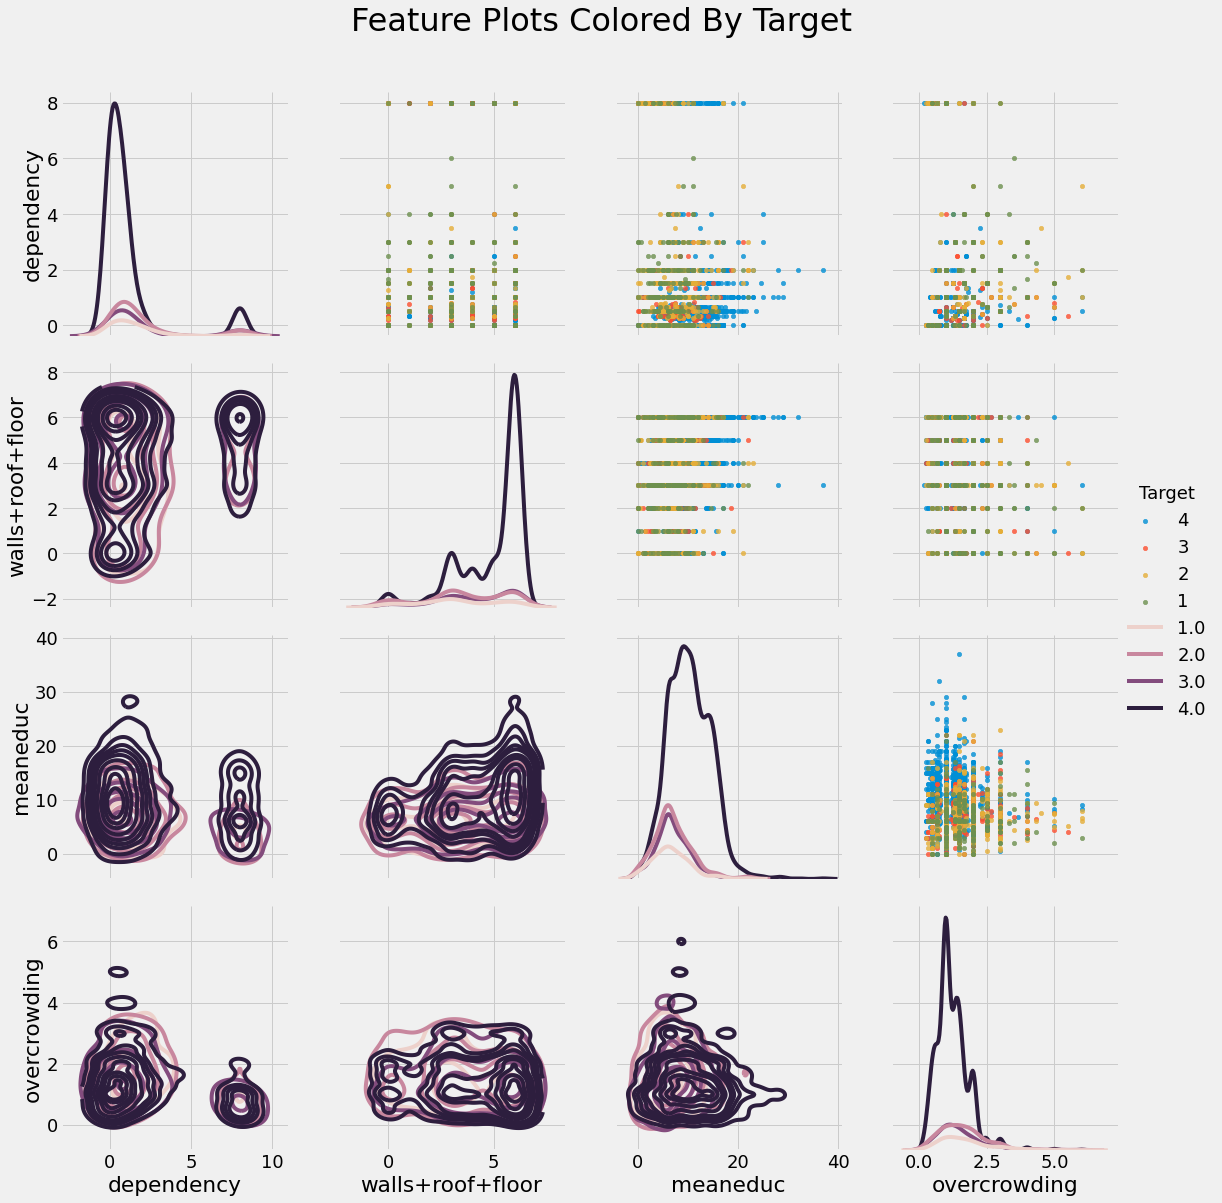

In [170]:
import warnings
warnings.filterwarnings('ignore')

# Copy the data for plotting
plot_data = train_heads[['Target', 'dependency', 'walls+roof+floor',
                         'meaneduc', 'overcrowding']]

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 4, diag_sharey=False,
                    hue = 'Target', hue_order = [4, 3, 2, 1], 
                    vars = [x for x in list(plot_data.columns) if x != 'Target'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.8, s = 20)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);
grid = grid.add_legend()
plt.suptitle('Feature Plots Colored By Target', size = 32, y = 1.05);

In [171]:
a = ['Target', 'dependency', 'walls+roof+floor', 'meaneduc', 'overcrowding']

지금은 가구 변수의 피처 엔지니어링을 놔두겠습니다. 만약 모델 퍼포먼스에 만족하지 못하면 나중에 이 단계로 돌아올 것입니다. 

In [172]:
household_feats = list(heads.columns)

# Individual Level Variables